# Vehicles in Personal Import Project


## Motivation
#### 
The primary problem tackled in this project is understanding and predicting vehicle trends in Israel to inform policymakers, manufacturers, and insurance providers. This analysis could be instrumental in improving road safety, optimizing fuel policies, and supporting the adoption of eco-friendly vehicles.
With the global shift toward sustainable energy, insights into fuel type trends and vehicle weight distributions are highly significant.

In [151]:
## Import Necessary Libraries
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Url of the data

In [83]:
url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=03adc637-b6fe-402b-9937-7c3d3afc9140&limit=30000'
response = requests.get(url)

if response.status_code == 200:
    json_data = response.json()
    records = json_data['result']['records']
    df = pd.DataFrame(records)
    df.head()
else:
    print(f"Failed to fetch data, status code: {response.status_code}")

# Data Overview
###### Displaying basic information about the dataset

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28458 entries, 0 to 28457
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 28458 non-null  int64 
 1   mispar_rechev       28458 non-null  int64 
 2   shilda              28458 non-null  object
 3   tozeret_cd          28458 non-null  object
 4   tozeret_nm          28458 non-null  object
 5   sug_rechev_cd       28458 non-null  object
 6   sug_rechev_nm       28458 non-null  object
 7   degem_nm            28458 non-null  object
 8   mishkal_kolel       28458 non-null  object
 9   shnat_yitzur        28458 non-null  object
 10  nefach_manoa        28458 non-null  object
 11  tozeret_eretz_nm    28424 non-null  object
 12  degem_manoa         28458 non-null  object
 13  mivchan_acharon_dt  28458 non-null  object
 14  tokef_dt            28458 non-null  object
 15  sug_yevu            28458 non-null  object
 16  moed_aliya_lakvish  25

In [85]:
df.describe()

_id  mispar_rechev
count  28458.000000   2.845800e+04
mean   14229.500000   2.641576e+07
std     8215.261317   3.382218e+07
min        1.000000   1.100000e+04
25%     7115.250000   9.215746e+06
50%    14229.500000   9.520835e+06
75%    21343.750000   9.930109e+06
max    28458.000000   9.777770e+07

In [86]:
df.head()

_id  mispar_rechev             shilda tozeret_cd      tozeret_nm  \
0    1        4958800  1G4CU5214SH621603        156     ביואיק ארהב   
1    2        9999915  WDB2110651A062176        593  מרצדס בנץ גרמנ   
2    3        4680000  2G2FS22S652202832        725         פונטיאק   
3    4        9167173  4T1BB3EK2BU139522        488    טויוטה ארה"ב   
4    5        9817771  5UXZW0C51BL656317        722    ב מ וו ארה"ב   

  sug_rechev_cd sug_rechev_nm            degem_nm mishkal_kolel shnat_yitzur  \
0           112   פרטי נוסעים                CU69             0         1995   
1           112   פרטי נוסעים              211065             0         2002   
2           112   פרטי נוסעים                FS87             0         1995   
3           112   פרטי נוסעים  היברדAHV40L-CEXGBA             0         2011   
4           112   פרטי נוסעים                ZW41             0         2010   

  nefach_manoa tozeret_eretz_nm degem_manoa mivchan_acharon_dt    tokef_dt  \
0         3785            ארה"ב         KT1         2023-09-11  2023-12-27   
1         3199           גרמניה        M112         2024-07-24  2025-01-22   
2         3352            ארה"ב         2SS         2023-12-11  2024-02-07   
3         2400            ארה"ב         2AZ         2024-02-06  2025-01-31   
4         2993            ארה"ב       306DS         2023-06-06  2023-12-31   

          sug_yevu moed_aliya_lakvish sug_delek_nm  
0    יבוא אישי-חדש               None        בנזין  
1  יבוא אישי-משומש               None        בנזין  
2    יבוא אישי-חדש               None        בנזין  
3  יבוא אישי-משומש             2011-1        בנזין  
4  יבוא אישי-משומש            2010-12         דיזל

In [87]:
#(rows, columns)
df.shape

(28458, 18)

In [88]:
df.columns

Index(['_id', 'mispar_rechev', 'shilda', 'tozeret_cd', 'tozeret_nm',
       'sug_rechev_cd', 'sug_rechev_nm', 'degem_nm', 'mishkal_kolel',
       'shnat_yitzur', 'nefach_manoa', 'tozeret_eretz_nm', 'degem_manoa',
       'mivchan_acharon_dt', 'tokef_dt', 'sug_yevu', 'moed_aliya_lakvish',
       'sug_delek_nm'],
      dtype='object')

In [89]:
df.dtypes

_id                    int64
mispar_rechev          int64
shilda                object
tozeret_cd            object
tozeret_nm            object
sug_rechev_cd         object
sug_rechev_nm         object
degem_nm              object
mishkal_kolel         object
shnat_yitzur          object
nefach_manoa          object
tozeret_eretz_nm      object
degem_manoa           object
mivchan_acharon_dt    object
tokef_dt              object
sug_yevu              object
moed_aliya_lakvish    object
sug_delek_nm          object
dtype: object

##### Columns summary:

# Data Preprocessing

###### Handle missing values
###### Replace or drop as needed

In [90]:
#analyze missing values in the columns
df.isnull().sum().sort_values()

_id                      0
sug_yevu                 0
tokef_dt                 0
mivchan_acharon_dt       0
degem_manoa              0
nefach_manoa             0
shnat_yitzur             0
mishkal_kolel            0
sug_rechev_nm            0
sug_rechev_cd            0
tozeret_nm               0
tozeret_cd               0
shilda                   0
mispar_rechev            0
degem_nm                 0
sug_delek_nm             0
tozeret_eretz_nm        34
moed_aliya_lakvish    2771
dtype: int64

In [91]:
#Fill the missing values with Unknown
df['degem_nm'] = df['degem_nm'].fillna('Unknown')
df['degem_manoa'] = df['degem_manoa'].fillna('Unknown')
df['tozeret_eretz_nm'] = df['tozeret_eretz_nm'].fillna('Unknown')
df['moed_aliya_lakvish'] = df['moed_aliya_lakvish'].fillna('Unknown')

In [92]:
#Checking the status with missing values
print(df.isnull().sum())

_id                   0
mispar_rechev         0
shilda                0
tozeret_cd            0
tozeret_nm            0
sug_rechev_cd         0
sug_rechev_nm         0
degem_nm              0
mishkal_kolel         0
shnat_yitzur          0
nefach_manoa          0
tozeret_eretz_nm      0
degem_manoa           0
mivchan_acharon_dt    0
tokef_dt              0
sug_yevu              0
moed_aliya_lakvish    0
sug_delek_nm          0
dtype: int64


In [93]:
df['sug_rechev_cd'].unique()

array(['112', '450', '433', '344', '341', '113', '010', '060', '050',
       '170', '162', '161', '111', '142', '871', '214', '215', '464',
       '121', '817', '174', '810', '261', '860', '703', '218', '110',
       '141', '458', '372', '434', '223', '460', '432', '228', '212',
       '020', '409', '210', '431', '704', '640', '163', '470', '438',
       '200', '815', '429', '230', '160', '479', '114', '705', '830',
       '502', '217', '404', '245', '872', '630', '072', '449', '439',
       '233', '614', '773', '570', '504', '535', '536', '530', '548',
       '620', '622', '771', '292'], dtype=object)

In [94]:
df['shnat_yitzur'].unique()

array(['1995', '2002', '2011', '2010', '2013', '2012', '2014', '2016',
       '2017', '2009', '2018', '1990', '2000', '1994', '1980', '1987',
       '1988', '2023', '2020', '2022', '2019', '2008', '2015', '2007',
       '1999', '1977', '1979', '1983', '2005', '2021', '1989', '2001',
       '1981', '2003', '2006', '1986', '1965', '2024', '1966', '1991',
       '1973', '1992', '1985', '1974', '1993', '1982', '1967', '2004',
       '1998', '1978', '1975', '1984', '1971', '1950', '1963', '1976',
       '1961', '1996', '1969', '1952', '1956', '1997', '1937', '1968',
       '1930', '1964', '1972', '1960', '1955', '1958', '1970', '1957',
       '1949', '1931', '1962', '1929', '1919', '1959', '1936', '1939',
       '1948', '1933', '1954', '1953', '2025', '1947', '1927', '1951',
       '1940', '1942', '1921', '1932', '1926', '1935', '1924', '1938',
       '1945', '1928'], dtype=object)

In [95]:
df['mivchan_acharon_dt'].unique()

array(['2023-09-11', '2024-07-24', '2023-12-11', '2024-02-06',
       '2023-06-06', '2023-01-09', '2024-05-27', '2024-04-10',
       '2024-01-07', '2023-05-15', '2023-06-26', '2023-11-10',
       '2024-11-03', '2023-07-31', '2023-07-25', '2024-03-22',
       '2024-02-08', '2024-09-04', '2024-04-21', '2024-03-20',
       '2024-03-07', '2024-06-04', '2024-06-26', '2024-05-28',
       '2024-03-28', '2024-11-07', '2024-06-23', '2024-12-04',
       '2024-05-26', '2024-02-02', '2024-12-01', '2025-01-14',
       '2023-10-26', '2025-01-07', '2024-01-28', '2024-10-01',
       '2024-04-11', '2024-08-20', '2023-12-01', '2024-12-15',
       '2023-12-21', '2024-06-10', '2024-12-25', '2023-09-07',
       '2023-02-19', '2024-01-24', '2024-02-21', '2024-10-30',
       '2023-07-18', '2022-05-04', '2024-07-25', '2024-06-24',
       '2024-01-04', '2024-01-31', '2024-10-08', '2024-10-20',
       '2024-06-20', '2023-11-30', '2024-09-20', '2024-10-09',
       '2024-02-19', '2023-12-17', '2024-05-20', '2024-

In [96]:
#Convert to column "mivhan aharon" datetime
df['mivchan_acharon_dt'] = pd.to_datetime(df['mivchan_acharon_dt'], errors='coerce')
df['mivchan_acharon_dt'].head()

0   2023-09-11
1   2024-07-24
2   2023-12-11
3   2024-02-06
4   2023-06-06
Name: mivchan_acharon_dt, dtype: datetime64[ns]

In [97]:
df['tokef_dt'].unique()

array(['2023-12-27', '2025-01-22', '2024-02-07', '2025-01-31',
       '2023-12-31', '2025-03-31', '2024-11-30', '2024-11-14',
       '2024-09-30', '2025-10-31', '2024-06-30', '2024-10-10',
       '2025-02-28', '2025-05-31', '2025-06-30', '2025-11-30',
       '2026-01-31', '2026-01-04', '2026-01-26', '2025-06-28',
       '2025-01-01', '2025-02-19', '2024-09-06', '2026-01-01',
       '2025-02-18', '2024-08-21', '2025-12-14', '2024-07-31',
       '2025-04-30', '2025-09-30', '2025-07-31', '2024-01-31',
       '2025-07-03', '2025-05-02', '2024-10-31', '2024-10-13',
       '2025-06-25', '2024-12-31', '2024-10-30', '2025-01-18',
       '2024-10-29', '2025-09-10', '2024-03-19', '2024-08-31',
       '2024-08-05', '2025-08-24', '2025-04-04', '2025-07-16',
       '2025-04-28', '2025-04-05', '2024-04-30', '2025-05-17',
       '2025-08-31', '2025-12-31', '2024-03-31', '2024-02-18',
       '2024-10-03', '2024-08-07', '2024-12-15', '2024-02-28',
       '2024-11-09', '2025-11-02', '2024-12-25', '2024-

In [98]:
#Convert to column "mivhan aharon" datetime
df['tokef_dt'] = pd.to_datetime(df['tokef_dt'], errors='coerce')
df['tokef_dt'].head()

0   2023-12-27
1   2025-01-22
2   2024-02-07
3   2025-01-31
4   2023-12-31
Name: tokef_dt, dtype: datetime64[ns]

In [99]:
df['sug_yevu'].unique()

array(['יבוא אישי-חדש', 'יבוא אישי-משומש'], dtype=object)

In [100]:
# Convert to datetime
df['moed_aliya_lakvish'] = pd.to_datetime(df['moed_aliya_lakvish'], format='%Y-%m', errors='coerce')

In [101]:
df['sug_delek_nm'].unique()

array(['בנזין', 'דיזל', 'גפ"מ', 'חשמל/בנזין', 'לא ידוע קוד 0', 'חשמל',
       'חשמל/דיזל', 'גז טבעי דחוס'], dtype=object)

In [102]:
#replace 'לא ידוע קוד 0' to Unknown
df['sug_delek_nm'] = df['sug_delek_nm'].replace("לא ידוע קוד 0", "Unknown")
df['sug_delek_nm'] 

0        בנזין
1        בנזין
2        בנזין
3        בנזין
4         דיזל
         ...  
28453    בנזין
28454    בנזין
28455    בנזין
28456    בנזין
28457     דיזל
Name: sug_delek_nm, Length: 28458, dtype: object

In [103]:
df['sug_delek_nm'] = df['sug_delek_nm'].fillna('Unknown')

In [104]:
df['moed_aliya_lakvish'].fillna('Unknown', inplace=True)

In [105]:
#Checking the status with missing values
print(df.isnull().sum())

_id                   0
mispar_rechev         0
shilda                0
tozeret_cd            0
tozeret_nm            0
sug_rechev_cd         0
sug_rechev_nm         0
degem_nm              0
mishkal_kolel         0
shnat_yitzur          0
nefach_manoa          0
tozeret_eretz_nm      0
degem_manoa           0
mivchan_acharon_dt    0
tokef_dt              0
sug_yevu              0
moed_aliya_lakvish    0
sug_delek_nm          0
dtype: int64


--------------------------------------------------------------------

# Scaling

####  Cleaning the 'tozeret_nm' column from names of manufacturing countries.

In [106]:
df['tozeret_nm'].unique()

array(['ביואיק ארהב', 'מרצדס בנץ גרמנ', 'פונטיאק', 'טויוטה ארה"ב',
       'ב מ וו ארה"ב', 'לנדרובר', 'מרצדס בנץ ארהב', 'ב מ וו גרמניה',
       'קרייזלר ארה"ב', 'שברולט קנדה', 'רובר אנגליה', 'שברולט ארה"ב',
       'פורד ארה"ב', 'אאודי', 'קאדילאק ארה"ב', 'ניסאן יפן',
       'וינגולד-גרורים', 'לואד רייט', "ג'י.אמ.סי", 'פורשה גרמניה',
       'יגואר', 'אלפא רומיאו', 'אאודי סלובקיה', 'לנדרובר אנגליה',
       'טויוטה קנדה', 'קרייזלר קנדה', 'דימלרקריזלר-גר', 'מרצדס-בנץ אוסט',
       'ג\'יפ ארה"ב', 'הונדה-ארה"ב', 'יונדאי ארה"ב', 'קיה קוריאה',
       'פולקסווגן סלוב', 'סמארט צרפת', 'פולקסווגן גרמנ', 'הארלי דיוידסון',
       'מיצובישי יפן', 'פולקסווגן מכסי', 'קן אם מקסיקו', 'שטייר-דמלר-פוך',
       'קן אמ קנדה', 'למבורגיני', 'טויוטה יפן', 'מרצדס בנץ ספרד',
       'וולבו שוודיה', 'אינפיניטי', 'הינו ואנטיק', 'טריאומף בריטי',
       'מזארטי איטליה', 'הונדה-יפן', 'ימהה יפן', 'סוזוקי-יפן',
       'אולדסמוביל', 'וולבו סין', 'פיאט', 'סיטרואן צרפת', 'פורד-ברזיל',
       'לקסוס יפן', 'לינקולן', 'סובארו אר

In [107]:
# The internal dictionary of countries and their abbreviations.
countries_dict = {
    "Germany": ["גרמניה", "גרמ", "גרמנ"],
   "USA": [ "ארהב", "ארה\"ב", "ארה''ב", "ארצות הברית","ארה'ב"],
    "France": ["צרפת", "פרנס"],
    "Italy": ["איטליה", "איטלקי",'אלפא רומיאו'],
    "Japan": ["יפן", "יפני"],
    "China": ["סין", "סיני"],
    "India": ["הודו", "הודית"],
    "South Korea": ["דרום קוריאה", "קוריאה", "קוריאני"],
    "UK": ["בריטניה", "אנגליה", "בריטני","בריטי","אנגלי"],
    "Spain": ["ספרד", "ספניול"],
    "Russia": ["רוסיה", "רוסי"],
    "Polin" :["פולי","פולין"],
    "Slovenia": ["סלובניה", "סלו"],
    "Russia": ["רוסיה","רוסי"],
    "Czechia": ["צ'כיה","צכיה"],
    "Mexico" : ["מקסיקו","מכסיקו","מכסי","מקסיק","מקסי"],
    "Netherland" :["הולנד"],
    "Thailand" : ["תאילנ","תאילנד"],
    "Sweeden" :["שוודיה","שוו"],
    "Belgia" :["בלגיה","בלד","בלגי"],
    "Turkey" :["טורקיה","טורכיה","תורכיה","תורקיה"],
    "Brazil" :["ברזיל"],
    "Canada" : ["קנדה"],
    "Maroco" :["מרוקו","מרוק"],
    "Finland" :["פיני","פינלנד"],
    "Austria" :["אוסטרי","אוסטריה","אוסטר"],
    "S.africa" : ["ד אפריקה","דרום אפ","ד.אפריקה"],
    "Argentina" : ["ארג","ארגנטינה"],
    "Equador" : ["אקוודור"],
    "Irland" : ["אירלנד"],
    "S.korea" : ["דרום קוריאה","דרום ק","דרום"],
    "Hungari" : ["הונגריה"],
    "Romania" :["רומניה"]
}

def Delit_country(df):
        df['tozeret_nm'] = df['tozeret_nm'].apply(lambda x: ' '.join([word for word in str(x).split() if not any(keyword in word for country_keywords in countries_dict.values() for keyword in country_keywords)]).strip())
        return df

In [108]:
df['tozeret_nm'].nunique()

394

In [109]:
Delit_country(df)

_id  mispar_rechev             shilda tozeret_cd tozeret_nm  \
0          1        4958800  1G4CU5214SH621603        156     ביואיק   
1          2        9999915  WDB2110651A062176        593  מרצדס בנץ   
2          3        4680000  2G2FS22S652202832        725    פונטיאק   
3          4        9167173  4T1BB3EK2BU139522        488     טויוטה   
4          5        9817771  5UXZW0C51BL656317        722     ב מ וו   
...      ...            ...                ...        ...        ...   
28453  28454        9004522  5FNRL5H61CB021126        341              
28454  28455       90414501  1C4RJFBG7HC791199        869    קרייזלר   
28455  28456        9040573  WBAFS51090C627498        143     ב מ וו   
28456  28457        9912469  5UXFG4C59AL226606        722     ב מ וו   
28457  28458        6977926  W1K2130051A839646        593  מרצדס בנץ   

      sug_rechev_cd sug_rechev_nm            degem_nm mishkal_kolel  \
0               112   פרטי נוסעים                CU69             0   
1               112   פרטי נוסעים              211065             0   
2               112   פרטי נוסעים                FS87             0   
3               112   פרטי נוסעים  היברדAHV40L-CEXGBA             0   
4               112   פרטי נוסעים                ZW41             0   
...             ...           ...                 ...           ...   
28453           112   פרטי נוסעים   RL5H6 EX-L אודיסי             0   
28454           112   פרטי נוסעים       CHEROKEE JFBG             0   
28455           112   פרטי נוסעים         528I   FS51             0   
28456           112   פרטי נוסעים                FG4C          2760   
28457           121         מונית         סדצרמ E220D          1775   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa  \
0             1995         3785            ארה"ב         KT1   
1             2002         3199           גרמניה        M112   
2             1995         3352            ארה"ב         2SS   
3             2011         2400            ארה"ב         2AZ   
4             2010         2993            ארה"ב       306DS   
...            ...          ...              ...         ...   
28453         2012         3471            ארה"ב       J35Z8   
28454         2017         3604            ארה"ב         ERB   
28455         2011         2996           גרמניה     N53B30A   
28456         2010         2979            ארה"ב     N54B30A   
28457         2020         1950           גרמניה      654920   

      mivchan_acharon_dt   tokef_dt         sug_yevu   moed_aliya_lakvish  \
0             2023-09-11 2023-12-27    יבוא אישי-חדש              Unknown   
1             2024-07-24 2025-01-22  יבוא אישי-משומש              Unknown   
2             2023-12-11 2024-02-07    יבוא אישי-חדש              Unknown   
3             2024-02-06 2025-01-31  יבוא אישי-משומש  2011-01-01 00:00:00   
4             2023-06-06 2023-12-31  יבוא אישי-משומש  2010-12-01 00:00:00   
...                  ...        ...              ...                  ...   
28453         2024-02-13 2025-01-16    יבוא אישי-חדש  2012-01-01 00:00:00   
28454         2024-01-23 2025-02-28  יבוא אישי-משומש  2017-02-01 00:00:00   
28455         2023-09-30 2024-03-31  יבוא אישי-משומש  2011-03-01 00:00:00   
28456         2024-07-03 2025-06-03    יבוא אישי-חדש  2010-04-01 00:00:00   
28457         2024-07-03 2025-05-31  יבוא אישי-משומש  2020-05-01 00:00:00   

      sug_delek_nm  
0            בנזין  
1            בנזין  
2            בנזין  
3            בנזין  
4             דיזל  
...            ...  
28453        בנזין  
28454        בנזין  
28455        בנזין  
28456        בנזין  
28457         דיזל  

[28458 rows x 18 columns]

###   Now, the code will be written to normalize car brand names and remove records with invalid or unidentifiable brand names.

In [110]:
def normalize_tozeret_nm(df):
    # מיפוי מותגים מנורמל לערכים שונים
    normalization_mapping = {
        "Dodge": ['Dodge', 'דודג', 'דודג\'', 'דודג\' קיו', 'דודג\' מיצובישי',"דודג מיצובישי"],
        "Mercedes-Benz": ['Mercedes-Benz', 'מרצדס', 'מרצדס בנץ', 'מרצדס-בנץ', 'דימלר בנץ', 'מרצדס-בנץ אוסט',"מרצדס בנץ הונג","מרצדס בנץ ד.אפ"],
        "Volkswagen": ['Volkswagen', 'פולקסווגן', 'פולקסוגן פורשה', 'פולקסווגן'],
        "Toyota": ['Toyota', 'טויוטה', 'טויוטה ב מ וו', 'טויוטה אפ','הילנדר'],
        "Land-Rover": ['Land-Rover', 'לנדרובר', 'רובר'],
        "BMW": ['BMW', 'ב מ וו', 'BMW','מ.וו אגוסטא אי'],
        "Chrysler": ['Chrysler', 'קרייזלר', 'קרייזלר מזארטי','דימלרקריזלר-אר'],
        "Alfa Romeo": ['Alfa Romeo', 'אלפא רומיאו'],
        "Cadillac": ['Cadillac', 'קאדילאק', 'פיאט קרייזלר'],
        "Rolls-Royce": ['Rolls-Royce', 'רולס-רויס'],
        "Ford": ['Ford', 'פורד'],
        "Jeep": ['Jeep', 'גיפ', 'גייפ', "ג'יפ", "ג'ייפ", 'גיפ-ישראל',"קייסר ג'יפ"],
        "Subaru": ['Subaru', 'סובארו'],
        "Chevrolet": ['Chevrolet', 'שברולט', 'שברולט ד.קוריא'],
        "Volvo": ['Volvo', 'וולבו', "וויט-וולוו"],
        "Tesla": ['Tesla', 'טסלה'],
        "Nissan": ['Nissan', 'ניסאן'],
        "Harley-Davidson": ['Harley-Davidson', 'הארלי דיוידסון'],
        "Mitsubishi": ['Mitsubishi', 'מיצובישי'],
        "Bombardier": ['Bombardier', 'בומברדיה'],
        "Audi": ['Audi', 'אאודי', 'אודי'],
        "Mazda": ['Mazda', 'מזדה'],
        "Lexus": ['Lexus', 'לקסוס'],
        "Lancia": ['Lancia', "לנצ'יה"],
        "Buick": ['Buick', 'ביואיק'],
        "Suzuki": ['Suzuki', 'סוזוקי'],
        "MG": ['MG', 'מ. ג', "אקס סי אם ג'י","אם ג'י טי גלוב","איי.אם ג'נרל"],
        "Pontiac": ['Pontiac', 'פונטיאק'],
        "Hyundai": ['Hyundai', 'יונדאי'],
        "Lamborghini": ['Lamborghini', 'למבורגיני'],
        "KTM": ['KTM', 'קן אם', 'קן אמ', 'קי.טי.אמ'],
        "Steyr-Daimler-Puch": ['Steyr-Daimler-Puch', 'שטייר-דמלר-פוך'],
        "Yamaha": ['Yamaha', 'ימהה'],
        "Oldsmobile": ['Oldsmobile', 'אולדסמוביל'],
        "Fiat": ['Fiat', 'פיאט','פיאט סרביה'],
        "Citroen": ['Citroen', 'סיטרואן'],
        "Smart": ['Smart', 'סמארט', "סמארט ג'.מ.ב.ה"],
        "McLaren": ['McLaren', 'מקלארין'],
        "Lincoln": ['Lincoln', 'לינקולן'],
        "Renault": ['Renault', 'רנו'],
        "GMC": ['GMC', "ג'י.אמ.סי"],
        "Ferrari": ['Ferrari', 'פרארי'],
        "Peugeot": ['Peugeot', "פיג'ו"],
        "Winnebago": ['Winnebago', 'ווינבאגו'],
        "Triumph": ['Triumph', 'טריאומף'],
        "Kia": ['Kia', 'קיה'],
        "Maserati": ['Maserati', 'מזארטי'],
        "Lotus": ['Lotus', 'לוטוס'],
        "Polaris": ['Polaris', 'פולריס'],
        "Morgan": ['Morgan', 'מורגן'],
        "Seat": ['Seat', 'סיאט'],
        "Royal Enfield": ['Royal Enfield', 'רויאל אנפלד','אנפילד','רויאל אינפילד'],
        "Skoda": ['Skoda', 'סקודה'],
        "Moto Guzzi": ['Moto Guzzi', 'מוטוגוצי'],
        "Piaggio": ['Piaggio', "פיאג'ו","פיגו"],
        "Hummer": ['Hummer', 'הימר','האמר ג.מ.'],
        "Dacia": ['Dacia', 'דאציה'],
        "Honda": ['Honda', 'הונדה'],
        "Plymouth": ['Plymouth', 'פלימוט'],
        "Kawasaki": ['Kawasaki', 'קוואסאקי'],
        "Isuzu": ['Isuzu', 'איסוזו'],
        "Saab": ['Saab', 'סאאב', 'סאאב שודיה'],
        "Caterham": ['Caterham', 'קטרהאם'],
        "Aston Martin": ['Aston Martin', 'אסטון מרטין'],
        "Bentley": ['Bentley', 'בנטלי'],
        "Chevrolet": ['Chevrolet', 'שברולט'],
        "Guzzi": ['Guzzi', 'מוטוגוצי'],
        "Ferrari": ['Ferrari', 'פרארי'],
        "Jaguar" : ["יגואר"],
        "Porche" : ['פורשה'],
        "Ducati" : ['דוקטי']
    }
    
    # Reversing the mapping to an inverted dictionary
    reverse_mapping = {value: key for key, values in normalization_mapping.items() for value in values}

    # Normalizing the values in a column.
    df["tozeret_nm"] = df["tozeret_nm"].map(reverse_mapping)

    # Deleting rows where there is no match for the brand (if the value in the column is not found in the dictionary).
    df = df[df["tozeret_nm"].notna()]

    return df

In [111]:
normalize_tozeret_nm(df)

_id  mispar_rechev             shilda tozeret_cd     tozeret_nm  \
0          1        4958800  1G4CU5214SH621603        156          Buick   
1          2        9999915  WDB2110651A062176        593  Mercedes-Benz   
2          3        4680000  2G2FS22S652202832        725        Pontiac   
3          4        9167173  4T1BB3EK2BU139522        488         Toyota   
4          5        9817771  5UXZW0C51BL656317        722            BMW   
...      ...            ...                ...        ...            ...   
28452  28453        5812621  1C4RJEAG8LC114053        239           Jeep   
28454  28455       90414501  1C4RJFBG7HC791199        869       Chrysler   
28455  28456        9040573  WBAFS51090C627498        143            BMW   
28456  28457        9912469  5UXFG4C59AL226606        722            BMW   
28457  28458        6977926  W1K2130051A839646        593  Mercedes-Benz   

      sug_rechev_cd sug_rechev_nm            degem_nm mishkal_kolel  \
0               112   פרטי נוסעים                CU69             0   
1               112   פרטי נוסעים              211065             0   
2               112   פרטי נוסעים                FS87             0   
3               112   פרטי נוסעים  היברדAHV40L-CEXGBA             0   
4               112   פרטי נוסעים                ZW41             0   
...             ...           ...                 ...           ...   
28452           112   פרטי נוסעים  GRAND CHEROKE JEAG             0   
28454           112   פרטי נוסעים       CHEROKEE JFBG             0   
28455           112   פרטי נוסעים         528I   FS51             0   
28456           112   פרטי נוסעים                FG4C          2760   
28457           121         מונית         סדצרמ E220D          1775   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa  \
0             1995         3785            ארה"ב         KT1   
1             2002         3199           גרמניה        M112   
2             1995         3352            ארה"ב         2SS   
3             2011         2400            ארה"ב         2AZ   
4             2010         2993            ארה"ב       306DS   
...            ...          ...              ...         ...   
28452         2019         3604            ארה"ב         ERB   
28454         2017         3604            ארה"ב         ERB   
28455         2011         2996           גרמניה     N53B30A   
28456         2010         2979            ארה"ב     N54B30A   
28457         2020         1950           גרמניה      654920   

      mivchan_acharon_dt   tokef_dt         sug_yevu   moed_aliya_lakvish  \
0             2023-09-11 2023-12-27    יבוא אישי-חדש              Unknown   
1             2024-07-24 2025-01-22  יבוא אישי-משומש              Unknown   
2             2023-12-11 2024-02-07    יבוא אישי-חדש              Unknown   
3             2024-02-06 2025-01-31  יבוא אישי-משומש  2011-01-01 00:00:00   
4             2023-06-06 2023-12-31  יבוא אישי-משומש  2010-12-01 00:00:00   
...                  ...        ...              ...                  ...   
28452         2024-02-13 2024-12-03    יבוא אישי-חדש  2019-12-01 00:00:00   
28454         2024-01-23 2025-02-28  יבוא אישי-משומש  2017-02-01 00:00:00   
28455         2023-09-30 2024-03-31  יבוא אישי-משומש  2011-03-01 00:00:00   
28456         2024-07-03 2025-06-03    יבוא אישי-חדש  2010-04-01 00:00:00   
28457         2024-07-03 2025-05-31  יבוא אישי-משומש  2020-05-01 00:00:00   

      sug_delek_nm  
0            בנזין  
1            בנזין  
2            בנזין  
3            בנזין  
4             דיזל  
...            ...  
28452        בנזין  
28454        בנזין  
28455        בנזין  
28456        בנזין  
28457         דיזל  

[26603 rows x 18 columns]

In [112]:
df['tozeret_nm'].unique()

array(['Buick', 'Mercedes-Benz', 'Pontiac', 'Toyota', 'BMW', 'Land-Rover',
       'Chrysler', 'Chevrolet', 'Ford', 'Audi', 'Cadillac', 'Nissan', nan,
       'GMC', 'Porche', 'Jaguar', 'Alfa Romeo', 'Jeep', 'Hyundai', 'Kia',
       'Volkswagen', 'Smart', 'Harley-Davidson', 'Mitsubishi', 'KTM',
       'Steyr-Daimler-Puch', 'Lamborghini', 'Volvo', 'Triumph',
       'Maserati', 'Yamaha', 'Oldsmobile', 'Fiat', 'Citroen', 'Lexus',
       'Lincoln', 'Subaru', 'Ferrari', 'Kawasaki', 'McLaren', 'Dodge',
       'Skoda', 'Bombardier', 'Rolls-Royce', 'Mazda', 'MG', 'Peugeot',
       'Winnebago', 'Tesla', 'Royal Enfield', 'Lancia', 'Suzuki',
       'Bentley', 'Polaris', 'Isuzu', 'Saab', 'Renault', 'Honda', 'Lotus',
       'Seat', 'Morgan', 'Guzzi', 'Ducati', 'Dacia', 'Plymouth',
       'Piaggio', 'Hummer', 'Aston Martin', 'Caterham'], dtype=object)

In [113]:
df['_id'].unique()

array([    1,     2,     3, ..., 28456, 28457, 28458], dtype=int64)

In [114]:
df['mispar_rechev'].nunique()

28458

In [115]:
df['shilda'].nunique()

28458

#####  We have several columns containing individual or unique values for each record. These values do not provide significant information and take up a lot of space, so we decided to remove them.

In [116]:
df.drop(['_id','mispar_rechev','shilda'], axis=1, inplace=True)

In [117]:
df.head()

tozeret_cd     tozeret_nm sug_rechev_cd sug_rechev_nm            degem_nm  \
0        156          Buick           112   פרטי נוסעים                CU69   
1        593  Mercedes-Benz           112   פרטי נוסעים              211065   
2        725        Pontiac           112   פרטי נוסעים                FS87   
3        488         Toyota           112   פרטי נוסעים  היברדAHV40L-CEXGBA   
4        722            BMW           112   פרטי נוסעים                ZW41   

  mishkal_kolel shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa  \
0             0         1995         3785            ארה"ב         KT1   
1             0         2002         3199           גרמניה        M112   
2             0         1995         3352            ארה"ב         2SS   
3             0         2011         2400            ארה"ב         2AZ   
4             0         2010         2993            ארה"ב       306DS   

  mivchan_acharon_dt   tokef_dt         sug_yevu   moed_aliya_lakvish  \
0         2023-09-11 2023-12-27    יבוא אישי-חדש              Unknown   
1         2024-07-24 2025-01-22  יבוא אישי-משומש              Unknown   
2         2023-12-11 2024-02-07    יבוא אישי-חדש              Unknown   
3         2024-02-06 2025-01-31  יבוא אישי-משומש  2011-01-01 00:00:00   
4         2023-06-06 2023-12-31  יבוא אישי-משומש  2010-12-01 00:00:00   

  sug_delek_nm  
0        בנזין  
1        בנזין  
2        בנזין  
3        בנזין  
4         דיזל

### We will now check for a match between the two columns: degem_manoa and nefach_manoa. 

In [118]:
def check_engine_volume_matching(df, engine_type_column, engine_volume_column):
    # Convert engine type to numerical values (category encoding)
    df[engine_type_column] = df[engine_type_column].astype('category')
    df['engine_type_numeric'] = df[engine_type_column].cat.codes
    
    # Group by engine type
    grouped = df.groupby(engine_type_column)
    
    total_matching_percentage = 0
    total_weight = 0  # Total weight (the number of times each engine type appears)
    
    for engine_type, group in grouped:
        # Calculate the percentage of matching engine volumes within the engine type group
        matching_rows = group[group[engine_volume_column] == group[engine_volume_column].iloc[0]]
        matching_percentage = (len(matching_rows) / len(group)) * 100
        
        # Calculate the weight of the engine type (the number of times it appears)
        weight = len(group)
        
        # Accumulate the weighted matching percentages
        total_matching_percentage += matching_percentage * weight
        total_weight += weight
        
        print(f"\nEngine type: {engine_type}")
        print(f"Percentage of rows with matching engine volume: {matching_percentage:.2f}%")
        print(f"Weight (count) of engine type: {weight}")
        print('-' * 50)
    
    # Calculate the weighted average of the matching percentages
    weighted_average_matching_percentage = total_matching_percentage / total_weight
    print(f"\nWeighted average matching percentage across all engine types: {weighted_average_matching_percentage:.2f}%")


In [119]:
check_engine_volume_matching(df, "degem_manoa", "nefach_manoa")


Engine type: 
Percentage of rows with matching engine volume: 95.81%
Weight (count) of engine type: 191
--------------------------------------------------

Engine type: (4)
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *18V8*
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *218*
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *3.7LV6*
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *350*
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: *3G8*
Percentage of rows with


Engine type: 1022 OHN
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 102942
Percentage of rows with matching engine volume: 20.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: 102945
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 102948
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 102962
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 102982
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 102987
Percentage of 


Engine type: 12ED
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 12H
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 12JC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 12L59491
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 12V-671Z
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 12ZEN
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 13
Percentage of rows wi


Engine type: 1M5
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1MB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1MV
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1MZ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1N2
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1N7
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1N8
Percentage of rows with matching e


Engine type: 256S
Percentage of rows with matching engine volume: 62.50%
Weight (count) of engine type: 8
--------------------------------------------------

Engine type: 256S1
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 8
--------------------------------------------------

Engine type: 256S2
Percentage of rows with matching engine volume: 66.67%
Weight (count) of engine type: 12
--------------------------------------------------

Engine type: 256S3
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 256S4
Percentage of rows with matching engine volume: 71.43%
Weight (count) of engine type: 7
--------------------------------------------------

Engine type: 256S5
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 256SZ
Percentage of rows with 


Engine type: 2AZ
Percentage of rows with matching engine volume: 17.21%
Weight (count) of engine type: 401
--------------------------------------------------

Engine type: 2B
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2B30AF
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2B6
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2B7
Percentage of rows with matching engine volume: 71.43%
Weight (count) of engine type: 7
--------------------------------------------------

Engine type: 2B8
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 16
--------------------------------------------------

Engine type: 2B813DX
Percentage of rows with mat


Engine type: 33PC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 340R
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 346
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 346EB
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 346KA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 346KB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 347
Percentage of rows with matc


Engine type: 472
Percentage of rows with matching engine volume: 66.67%
Weight (count) of engine type: 9
--------------------------------------------------

Engine type: 474912M
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 474B12M
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 478
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 4780EE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 47C
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 47E
Percentage of rows with 


Engine type: 535Z4
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5409E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 550
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5502
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 556
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5561
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 557
Percentage of rows with matc


Engine type: 7A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7C
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 7D01
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7DR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7E32E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7F
Percentage of rows with matching eng


Engine type: 8H
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 8H8
Percentage of rows with matching engine volume: 92.86%
Weight (count) of engine type: 14
--------------------------------------------------

Engine type: 8HZ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 8J
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 8K6
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 8K7
Percentage of rows with matching engine volume: 89.74%
Weight (count) of engine type: 39
--------------------------------------------------

Engine type: 8K8
Percentage of rows with matching engi


Engine type: AB01544
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ABA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: ABS
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ABTL
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ABV
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: AC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ACE
Percentage of rows with matchi


Engine type: ARO1911
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AS
Percentage of rows with matching engine volume: 66.67%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: AS30104
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AS30128
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AS30164
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ASB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ASCV
Percentage of rows 


Engine type: B42D4T56
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B44A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B452AS
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B46A20A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B46A20B
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: B46B20
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B46B201
Percentage


Engine type: BHLG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHLH
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHM
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHZ
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: BILK
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BJ2J
Percentage of rows with matchin


Engine type: C2G
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: C2U2
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: C30
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: C38
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: C3H
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: C45
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: C4H
Percentage of rows with matching e


Engine type: CJW
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: CJX
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: CJZ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 9
--------------------------------------------------

Engine type: CK15706
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CKD
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: CKF
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CKJ
Percentage of rows with matching


Engine type: DC13
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DC21F
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DC22E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DC902
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DCA
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: DCB
Percentage of rows with matching engine volume: 81.48%
Weight (count) of engine type: 27
--------------------------------------------------

Engine type: DCBE
Percentage of rows with mat


Engine type: EBW
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ECLE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ECN
Percentage of rows with matching engine volume: 85.71%
Weight (count) of engine type: 7
--------------------------------------------------

Engine type: ECTT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ED
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ED2
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ED3
Percentage of rows with matching e


Engine type: F108140
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F108CL
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F113A040
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F115
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F119 G040
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F119G040
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F1325
Percenta


Engine type: FGM
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: FGQ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: FGT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: FH
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: FH8
Percentage of rows with matching engine volume: 66.67%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: FHD
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: FHF
Percentage of rows with matching engi


Engine type: GF715868
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GFD
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GFE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GG75
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GGA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GGC
Percentage of rows with match


Engine type: HEMI
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: HEV12
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: HFA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: HFC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: HFT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: HG2
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: HGC
Percentage of rows with matchin


Engine type: K20A4
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: K20A6
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: K20C1
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: K20C4
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: K20C8
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: K23Z1
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: K24
Percentage of rows wit


Engine type: LC3B
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: LC3C
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: LC3D
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: LC4N
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: LC8
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: LC9
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: LCG
Percentage of rows with matching 


Engine type: M-278
Percentage of rows with matching engine volume: 58.82%
Weight (count) of engine type: 34
--------------------------------------------------

Engine type: M-281
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M-286
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M-44
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M-50
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M-64/06
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M-642
Percentage of rows w


Engine type: M270920
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M271
Percentage of rows with matching engine volume: 88.11%
Weight (count) of engine type: 143
--------------------------------------------------

Engine type: M271821
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M271860
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: M271861
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M271955
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M272
Percentage 


Engine type: M52T
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M546824
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M55/01
Percentage of rows with matching engine volume: 93.33%
Weight (count) of engine type: 15
--------------------------------------------------

Engine type: M5501
Percentage of rows with matching engine volume: 76.47%
Weight (count) of engine type: 17
--------------------------------------------------

Engine type: M5502
Percentage of rows with matching engine volume: 2.44%
Weight (count) of engine type: 41
--------------------------------------------------

Engine type: M55101
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: M55B304
Percentage of row


Engine type: N401
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: N42B18A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: N42B30A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: N43B20A
Percentage of rows with matching engine volume: 66.67%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: N43B20AA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: N46BLOB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: N47020C
Percentag


Engine type: NV
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NV7
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NW8
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 7
--------------------------------------------------

Engine type: NWW
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NWX
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: NZ0B20A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NZ2
Percentage of rows with matching


Engine type: PC01E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: PC02E
Percentage of rows with matching engine volume: 40.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: PC04E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: PC05E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: PC07G
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: PC08E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: PC09E
Percentage of rows wi


Engine type: RAR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: RAZ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: RB
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: RB20DET
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: RB25
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: RB26
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: RBSE
Percentage of rows with match


Engine type: SC28E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: SC322212
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SC32E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SC34E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SC46E
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: SC47E
Percentage of rows with matching engine volume: 93.94%
Weight (count) of engine type: 33
--------------------------------------------------

Engine type: SC47F
Percentage of rows


Engine type: V
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: V01057VA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V01077TB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V0125ZVA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V0130CUT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V020
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V0314ZAH
Percentage 


Engine type: X4P1X
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: X500X
Percentage of rows with matching engine volume: 75.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: X501
Percentage of rows with matching engine volume: 80.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: X512
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: X640X
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: X661X
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: X679X
Percentage of rows with m


Engine type: YGKM
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: YGKN
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: YH
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: YH01
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: YHKL
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: YHP
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: YJF
Percentage of rows with matchin

#### A matching average of 70.77% indicates a moderate correlation between engine volume and engine type. Given the moderate overlap, it is not advisable to consider removing either of the columns. 

In [120]:
check_engine_volume_matching(df, "degem_manoa", "degem_nm")


Engine type: 
Percentage of rows with matching engine volume: 0.52%
Weight (count) of engine type: 191
--------------------------------------------------

Engine type: (4)
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *18V8*
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *218*
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *3.7LV6*
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: *350*
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: *3G8*
Percentage of rows with 


Engine type: 110990
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 110994
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 110F
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 110F000
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: 111
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1117968
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 111951
Percentage of rows


Engine type: 1594C
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 15B67E6320
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 15BE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 15E4E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 15GB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 15GY
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 15K
Percentage of rows wi


Engine type: 1J*1KF
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1J*1LF
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 1J*_1JE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1J7
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1JA
Percentage of rows with matching engine volume: 20.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: 1JB
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: 1JE
Percentage of rows with ma


Engine type: 276.824
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 276.950
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 276.952
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 27682
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 276820
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 276821
Percentage of rows with matching engine volume: 10.00%
Weight (count) of engine type: 10
--------------------------------------------------

Engine type: 276822
Percentage o


Engine type: 2G2
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 2GB
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 2GH
Percentage of rows with matching engine volume: 20.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: 2GK
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2GLR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2GP
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 2GR
Percentage of rows with matching engi


Engine type: 2X7
Percentage of rows with matching engine volume: 12.50%
Weight (count) of engine type: 8
--------------------------------------------------

Engine type: 2X8
Percentage of rows with matching engine volume: 8.33%
Weight (count) of engine type: 12
--------------------------------------------------

Engine type: 2X9
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: 2YL
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2YZ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2Z
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2Z4
Percentage of rows with matching engin


Engine type: 33
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 330
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 331
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: 33M
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 33PC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 340R
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 346
Percentage of rows with matching en


Engine type: 3GX
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3H
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 3H1
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3H6
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 3H7
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 3H8
Percentage of rows with matching engine volume: 20.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: 3HS
Percentage of rows with matching engine


Engine type: 404SR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 40620F
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 406PN
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 408
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 408S
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 409
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 40JBAG14
Percentage of rows wi


Engine type: 5.7L
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 500
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 36
--------------------------------------------------

Engine type: 50053879
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 501
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 5012
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 5012 A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 50124
Percentage of rows with 


Engine type: 781
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 793
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 79K
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7C
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 7D01
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 7DR
Percentage of rows with matching engi


Engine type: AGG
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: AGK
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AGNK
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AGU
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: AH
Percentage of rows with matching engine volume: 20.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: AH01
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: AH03
Percentage of rows with matching eng


Engine type: AZC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AZR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AZU
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: AZZ
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: B
Percentage of rows with matching engine volume: 9.09%
Weight (count) of engine type: 11
--------------------------------------------------

Engine type: B 230 FT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B H K
Percentage of rows with matchin


Engine type: B36A15A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B381218H
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B38320B
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B38415A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B38415F
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B388157
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: B38A12A
Perce


Engine type: BHLG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHLH
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHM
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BHZ
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: BILK
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: BJ2J
Percentage of rows with matchin


Engine type: CWAA
Percentage of rows with matching engine volume: 66.67%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: CWBA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CWDA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CWG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CWGD
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CWJ
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: CX
Percentage of rows with matching


Engine type: DMLM
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DMT
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DN5
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DNA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DNF
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DNLL
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: DNR
Percentage of rows with matching


Engine type: EBLG
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: EBLL
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: EBM
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: EBV
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: EBW
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ECLE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ECN
Percentage of rows with matching


Engine type: ERBG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ERC
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ERD
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ERG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ERR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ERV
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: ES
Percentage of rows with matching e


Engine type: F8
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F825
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F86
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: F87
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 12
--------------------------------------------------

Engine type: F88
Percentage of rows with matching engine volume: 6.67%
Weight (count) of engine type: 15
--------------------------------------------------

Engine type: F8A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: F8B
Percentage of rows with matching eng


Engine type: G3GH
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: G3R
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: G4
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: G4D3
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: G4EB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: G4EE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: G4F
Percentage of rows with matchin


Engine type: GKW
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GL
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: GL1E
Percentage of rows with matching engine volume: 5.56%
Weight (count) of engine type: 18
--------------------------------------------------

Engine type: GL1F
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GL815
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: GLC
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: GLH
Percentage of rows with matching e


Engine type: J35A8
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: J35A9
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: J35V7
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: J35Y1
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: J35Y6
Percentage of rows with matching engine volume: 14.29%
Weight (count) of engine type: 7
--------------------------------------------------

Engine type: J35Y7
Percentage of rows with matching engine volume: 55.56%
Weight (count) of engine type: 18
--------------------------------------------------

Engine type: J35Z2
Percentage of rows wi


Engine type: LS.3
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: LS1
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: LS2
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: LS3
Percentage of rows with matching engine volume: 3.57%
Weight (count) of engine type: 28
--------------------------------------------------

Engine type: LS3-376
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: LS3376
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: LS7
Percentage of rows with matchi


Engine type: M112911
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 6
--------------------------------------------------

Engine type: M112912
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M112921
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M112955
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M112972
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M112973
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M113
Percentag


Engine type: M28
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: M28.19
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M28.42
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M28/11
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M28/15
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M28/20
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M28/44
Percentage of row


Engine type: M9603
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M961/04
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M96103
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M96104
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M96120
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: M967
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: M9670
Percentage of row


Engine type: N47D200
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: N47D20A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: N47D20C
Percentage of rows with matching engine volume: 11.11%
Weight (count) of engine type: 9
--------------------------------------------------

Engine type: N47D20D
Percentage of rows with matching engine volume: 12.50%
Weight (count) of engine type: 8
--------------------------------------------------

Engine type: N4C
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: N504E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: N51B30A
Percentage of 


Engine type: NSR
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NSS
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NSS1330A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NSSB30A
Percentage of rows with matching engine volume: 6.25%
Weight (count) of engine type: 16
--------------------------------------------------

Engine type: NSSB3A
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NSWNSW
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: NSX
Percentage of rows w


Engine type: SD08E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SD9
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SEAS
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: SF14E
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SFW
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: SG
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: SG14E
Percentage of rows with matchi


Engine type: V0628ZVA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V0715ZMO
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V072CKX
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V073IHE
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V0801HK
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V08037WA
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: V0808
Perce


Engine type: X8P8X
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: X8P9X
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: X8W8X
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: X8X9X
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: XAGBX
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: XB
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: XB1
Percentage of rows with mat


Engine type: YYA
Percentage of rows with matching engine volume: 15.38%
Weight (count) of engine type: 13
--------------------------------------------------

Engine type: YYB
Percentage of rows with matching engine volume: 33.33%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: Z
Percentage of rows with matching engine volume: 25.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: Z/85
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: Z12XEP
Percentage of rows with matching engine volume: 50.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: Z13
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: Z14EXP
Percentage of rows with matching

#### A matching average of 25.69% indicates a moderate correlation between engine type and car model. Given the moderate overlap, it is not advisable to consider removing either of the columns. 

### degem_nm

In [121]:
df['degem_nm'].nunique()

17511

#### There is a proliferation of unique values. We will attempt to address this issue by extracting the main model name.

In [122]:
def replace_degem_with_model(df, column_name):
    car_models = [
    'Challenger', 'Ram', 'C-Class', 'E-Class', 'A-Class', 'Golf', 'Passat', 'Tiguan',
    'Corolla', 'Yaris', 'Hilux', 'Land Cruiser', 'Discovery', 'Evoque', 'Sport', 
    '3 Series', '5 Series', 'X5', '300C', 'Giulia', 'Stelvio', 'XT5', 'Escalade', 
    'Phantom', 'Focus', 'Fiesta', 'Kuga', 'Wrangler', 'Cherokee', 'Grand Cherokee',
    'Impreza', 'Outback', 'Forester', 'Malibu', 'Silverado', '911', 'Cayenne', 'Macan', 
    'XC90', 'XC60', 'S60', 'XE', 'F-Type', 'XF', 'Model 3', 'Model S', 'Model X',
    'X-Trail', 'Altima', 'Qashqai', 'Touring', 'Sportster', 'Outlander', 'ASX', 'ATV',
    'A4', 'Q5', 'A6', 'Mazda 3', 'mazda 3', 'mazda3', 'CX-5', 'MX-5', 'RX', 'NX', 'IS', 'Ypsilon', 'Enclave',
    'Vitara', 'Swift', 'ZS', 'Vibe', 'i10', 'Tucson', 'Sonata', 'Urus', 'Huracán',
    'Aventador', 'Pinzgauer', 'Civic', 'CR-V', 'Duster', 'Sandero', 'Voyager', 'D-Max', 
    '9-3', 'Octavia', 'Superb', '3-Wheeler', 'Leon', 'Ateca', 'Levante', 'Ghibli', 
    'Duster', 'Sandero', 'Clio', 'Koleos', 'Captur', 'Sierra', '488', 'Portofino', 
    '3008', '508', 'RV', '720S', '570S', 'Navigator', 'Continental', 'M3', 'M5',
    'Q7', 'Q8', 'A1', 'A3', 'A5', 'A7', 'S-Class', 'SL-Class', 'V-Class', 'Viano', 
    'Range Rover', 'Defender', 'S-Type', 'M-Class', 'Tucson', 'Seltos', 'Soul', 'Stinger', 
    'Optima', 'Rio', 'Cadenza', 'Niro', 'Sonic', 'Malibu', 'Camaro', 'Tahoe',
    'Avalanche', 'Express', 'HHR', 'Z06', 'Blazer', 'F-150', 'Fusion', 'Expedition',
    'F-250', 'F-350', 'Fiesta ST', 'Bronco', 'Maverick', 'Explorer', 'Edge', 
    'Escape', 'Civic Type R', 'CR-Z', 'Pilot', 'Insight', 'Fit', 'Ridgeline', 
    'Odyssey', 'Element', 'Clarity', 'Passport', 'Accord', 'Tundra', 'FJ Cruiser',
    'Land Cruiser Prado', 'Sequoia', 'Camry', 'Prius', 'Auris', 'C-HR', 'Corolla Cross', 
    'Eclipse', 'Delica', 'Outlander', 'Montero', 'Challenger R/T', 'Grand Caravan', 
    'F-450', 'F-550', 'F-650', 'F-750', 'DB11', 'DBX', 'Vantage', 'Flying Spur',
    'Continental GT', 'Bentayga', 'Chiron', 'Veyron', 'Chiron Sport', 'Huayra', 
    'Agera RS', 'Jesko', 'Gemera', 'One:1', 'GT', 'Shelby GT500', 'Stingray', 
    'Cayman', 'Macan', 'Boxster', '911 Turbo', 'Levante', 'Ghibli', 'Quattroporte', 
    'Stelvio', 'Giulia', '500', '500X', 'Renegade', 'R/T', 'Escalade ESV', 
    'CT6', 'Silverado RST', 'Pacifica', '300C', '1500 Rebel', '2500 Power Wagon', 
    '3500 Limited', 'Tiguan', 'Atlas', 'Arteon', 'Jetta', 'Golf R', 'RS7', 'A3', 
    'Q3', 'A6', 'X3', 'X4', 'X7', 'M3', 'M5', 'S-Class', 'G-Class', 'GLA', 'CLA', 
    'E-Class Coupe', 'F-Type', 'XF', 'XE', 'I-PACE', 'Defender 90', 'Discovery Sport', 
    'Evoque', 'Sport', 'Cooper', 'Sonata Hybrid', 'Elantra', 'Tucson Hybrid', 
    'Santa Fe', 'Kona', 'CX-5', 'CX-30', 'MX-30', 'Mazda6', 'Pathfinder', 'Frontier', 
    'Rogue Sport', 'Juke', 'Altima SR', 'Versa', 'Avalon', 'Sienna', 'Prius Prime', 
    'Tacoma', 'RAV4', 'Seltos', 'Telluride', 'Forte', 'Sorento', 'Mustang', 'Ranger', 
    'Bronco Sport', 'Transit', 'Traverse', 'Equinox', 'Blazer RS', 'Malibu LS', 
    '208', '3008', '5008', 'Fiesta ST', 'SF90 Stradale', '488 GTB', 'Roma', 
    'Levante', 'MC20', 'V8 Vantage', '918 Spyder', 'Huracán Performante', 'Urus', 
    'Macan S', '911 Carrera 4S', 'Chiron Sport', 'Regera', 'One:1', 'Zonda', 
    'Huayra Roadster BC', '720S', '765LT',"קמרי","סיינה"
]

    df[column_name] = df[column_name].apply(lambda x: next((model for model in car_models if str(model).lower() in str(x).lower()), x))
    return df

In [123]:
replace_degem_with_model(df, "degem_nm")

tozeret_cd     tozeret_nm sug_rechev_cd sug_rechev_nm  \
0            156          Buick           112   פרטי נוסעים   
1            593  Mercedes-Benz           112   פרטי נוסעים   
2            725        Pontiac           112   פרטי נוסעים   
3            488         Toyota           112   פרטי נוסעים   
4            722            BMW           112   פרטי נוסעים   
...          ...            ...           ...           ...   
28453        341            NaN           112   פרטי נוסעים   
28454        869       Chrysler           112   פרטי נוסעים   
28455        143            BMW           112   פרטי נוסעים   
28456        722            BMW           112   פרטי נוסעים   
28457        593  Mercedes-Benz           121         מונית   

                 degem_nm mishkal_kolel shnat_yitzur nefach_manoa  \
0                    CU69             0         1995         3785   
1                  211065             0         2002         3199   
2                    FS87             0         1995         3352   
3      היברדAHV40L-CEXGBA             0         2011         2400   
4                    ZW41             0         2010         2993   
...                   ...           ...          ...          ...   
28453   RL5H6 EX-L אודיסי             0         2012         3471   
28454            Cherokee             0         2017         3604   
28455         528I   FS51             0         2011         2996   
28456                FG4C          2760         2010         2979   
28457         סדצרמ E220D          1775         2020         1950   

      tozeret_eretz_nm degem_manoa mivchan_acharon_dt   tokef_dt  \
0                ארה"ב         KT1         2023-09-11 2023-12-27   
1               גרמניה        M112         2024-07-24 2025-01-22   
2                ארה"ב         2SS         2023-12-11 2024-02-07   
3                ארה"ב         2AZ         2024-02-06 2025-01-31   
4                ארה"ב       306DS         2023-06-06 2023-12-31   
...                ...         ...                ...        ...   
28453            ארה"ב       J35Z8         2024-02-13 2025-01-16   
28454            ארה"ב         ERB         2024-01-23 2025-02-28   
28455           גרמניה     N53B30A         2023-09-30 2024-03-31   
28456            ארה"ב     N54B30A         2024-07-03 2025-06-03   
28457           גרמניה      654920         2024-07-03 2025-05-31   

              sug_yevu   moed_aliya_lakvish sug_delek_nm  engine_type_numeric  
0        יבוא אישי-חדש              Unknown        בנזין                 4163  
1      יבוא אישי-משומש              Unknown        בנזין                 4478  
2        יבוא אישי-חדש              Unknown        בנזין                  993  
3      יבוא אישי-משומש  2011-01-01 00:00:00        בנזין                  924  
4      יבוא אישי-משומש  2010-12-01 00:00:00         דיזל                 1050  
...                ...                  ...          ...                  ...  
28453    יבוא אישי-חדש  2012-01-01 00:00:00        בנזין                 3960  
28454  יבוא אישי-משומש  2017-02-01 00:00:00        בנזין                 3355  
28455  יבוא אישי-משומש  2011-03-01 00:00:00        בנזין                 4965  
28456    יבוא אישי-חדש  2010-04-01 00:00:00        בנזין                 4967  
28457  יבוא אישי-משומש  2020-05-01 00:00:00         דיזל                 1723  

[28458 rows x 16 columns]

In [124]:
df['degem_nm'].nunique()

13786

In [125]:
def compute_column_correlations(df, col1, col2, threshold):
    # Filter out rows with missing values in the specified columns
    valid_rows = df.dropna(subset=[col1, col2])
    
    # Initialize dictionaries to hold the unique corresponding values between the columns
    col1_to_col2 = {}
    col2_to_col1 = {}
    
    # Populate the dictionaries with unique corresponding values
    for item in valid_rows[col1].unique():
        col1_to_col2[item] = valid_rows[valid_rows[col1] == item][col2].unique().tolist()
    for item in valid_rows[col2].unique():
        col2_to_col1[item] = valid_rows[valid_rows[col2] == item][col1].unique().tolist()
    
    # Calculate the percentage of keys where the corresponding list length is 1
    percentage_single_value_col1 = sum(1 for val_list in col1_to_col2.values() if len(val_list) == 1) / len(col1_to_col2) * 100
    percentage_single_value_col2 = sum(1 for val_list in col2_to_col1.values() if len(val_list) == 1) / len(col2_to_col1) * 100
    
    # Compare the percentages with the threshold
    if percentage_single_value_col1 > threshold and percentage_single_value_col2 > threshold:
        print(f"Column '{col1}' has {percentage_single_value_col1:.2f}% of keys with a single value list.")
        print(f"Column '{col2}' has {percentage_single_value_col2:.2f}% of keys with a single value list.")
    elif percentage_single_value_col1 > threshold:
        print(f"Column '{col2}' does not meet the condition ({percentage_single_value_col2:.2f}%), while column '{col1}' meets it with {percentage_single_value_col1:.2f}%.")
    elif percentage_single_value_col2 > threshold:
        print(f"Column '{col1}' does not meet the condition ({percentage_single_value_col1:.2f}%), while column '{col2}' meets it with {percentage_single_value_col2:.2f}%.")
    else:
        print(f"Neither column meets the threshold of {threshold}. Column '{col1}' has {percentage_single_value_col1:.2f}% and column '{col2}' has {percentage_single_value_col2:.2f}%.")


#### `sug_rechev_cd` and `sug_rechev_nm` are two columns that are expected to contain values with a high correlation between them.

In [126]:
compute_column_correlations(df, 'sug_rechev_cd', 'sug_rechev_nm', 90)

Column 'sug_rechev_cd' has 100.00% of keys with a single value list.
Column 'sug_rechev_nm' has 98.61% of keys with a single value list.


In [127]:
df.drop('sug_rechev_cd', axis=1, inplace=True)

#### shnat_yitzur & moed_aliya_lakvish 

In [128]:
df['moed_aliya_lakvish'].nunique()

706

In [129]:
df.drop('moed_aliya_lakvish', axis=1, inplace=True)

#### degem_manoa & degem_nm

In [130]:
compute_column_correlations(df, 'degem_manoa', 'degem_nm', 90)

Neither column meets the threshold of 90. Column 'degem_manoa' has 69.93% and column 'degem_nm' has 89.38%.


In [131]:
df['degem_nm'].nunique()

13786

#### tozeret_nm & tozeret_cd

In [132]:
compute_column_correlations(df, 'tozeret_cd', 'tozeret_nm', 90)

Column 'tozeret_nm' does not meet the condition (35.29%), while column 'tozeret_cd' meets it with 100.00%.


In [133]:
df.drop('tozeret_cd', axis=1, inplace=True)

#### 	engine_type_numeric & degem_manoa

In [134]:
check_engine_volume_matching(df, 'engine_type_numeric', 'degem_manoa')


Engine type: 0
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 191
--------------------------------------------------

Engine type: 1
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 4
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 6
Percentage of rows with matching engine volume


Engine type: 104
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 105
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 106
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 107
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 108
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 109
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 110
Percentage of rows with matching e


Engine type: 807
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 17
--------------------------------------------------

Engine type: 808
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 809
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 17
--------------------------------------------------

Engine type: 810
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 4
--------------------------------------------------

Engine type: 811
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 812
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 813
Percentage of rows with matching


Engine type: 1060
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1061
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 6
--------------------------------------------------

Engine type: 1062
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1063
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 5
--------------------------------------------------

Engine type: 1064
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1065
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1066
Percentage of rows with mat


Engine type: 1290
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 26
--------------------------------------------------

Engine type: 1291
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1292
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 1293
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 6
--------------------------------------------------

Engine type: 1294
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1295
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1296
Percentage of rows with ma


Engine type: 1562
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1563
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 1564
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1565
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1566
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1567
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1568
Percentage of rows with mat


Engine type: 1727
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1728
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1729
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1730
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1731
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1732
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 1733
Percentage of rows with mat


Engine type: 2088
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 2089
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2090
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 82
--------------------------------------------------

Engine type: 2091
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2092
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2093
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2094
Percentage of rows with ma


Engine type: 2330
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 2331
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2332
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2333
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2334
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2335
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 2336
Percentage of rows with mat


Engine type: 3005
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 3006
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 3007
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3008
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3009
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3010
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3011
Percentage of rows with mat


Engine type: 3351
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3352
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 3353
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3354
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3355
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 500
--------------------------------------------------

Engine type: 3356
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3357
Percentage of rows with m


Engine type: 3743
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3744
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3745
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3746
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3747
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3748
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 3749
Percentage of rows with mat


Engine type: 4352
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 87
--------------------------------------------------

Engine type: 4353
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 8
--------------------------------------------------

Engine type: 4354
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 4355
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 14
--------------------------------------------------

Engine type: 4356
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 4357
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 4358
Percentage of rows with m


Engine type: 4804
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 4805
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 4806
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 4807
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 4808
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 4809
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 4810
Percentage of rows with mat


Engine type: 5307
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 5308
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5309
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5310
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 136
--------------------------------------------------

Engine type: 5311
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5312
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 9
--------------------------------------------------

Engine type: 5313
Percentage of rows with m


Engine type: 5717
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5718
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5719
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5720
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5721
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 3
--------------------------------------------------

Engine type: 5722
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 5723
Percentage of rows with mat


Engine type: 6002
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 42
--------------------------------------------------

Engine type: 6003
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 6004
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 6005
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 6006
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 2
--------------------------------------------------

Engine type: 6007
Percentage of rows with matching engine volume: 100.00%
Weight (count) of engine type: 1
--------------------------------------------------

Engine type: 6008
Percentage of rows with ma

In [135]:
df.drop('engine_type_numeric', axis=1, inplace=True)

In [136]:
df

tozeret_nm sug_rechev_nm            degem_nm mishkal_kolel  \
0              Buick   פרטי נוסעים                CU69             0   
1      Mercedes-Benz   פרטי נוסעים              211065             0   
2            Pontiac   פרטי נוסעים                FS87             0   
3             Toyota   פרטי נוסעים  היברדAHV40L-CEXGBA             0   
4                BMW   פרטי נוסעים                ZW41             0   
...              ...           ...                 ...           ...   
28453            NaN   פרטי נוסעים   RL5H6 EX-L אודיסי             0   
28454       Chrysler   פרטי נוסעים            Cherokee             0   
28455            BMW   פרטי נוסעים         528I   FS51             0   
28456            BMW   פרטי נוסעים                FG4C          2760   
28457  Mercedes-Benz         מונית         סדצרמ E220D          1775   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa  \
0             1995         3785            ארה"ב         KT1   
1             2002         3199           גרמניה        M112   
2             1995         3352            ארה"ב         2SS   
3             2011         2400            ארה"ב         2AZ   
4             2010         2993            ארה"ב       306DS   
...            ...          ...              ...         ...   
28453         2012         3471            ארה"ב       J35Z8   
28454         2017         3604            ארה"ב         ERB   
28455         2011         2996           גרמניה     N53B30A   
28456         2010         2979            ארה"ב     N54B30A   
28457         2020         1950           גרמניה      654920   

      mivchan_acharon_dt   tokef_dt         sug_yevu sug_delek_nm  
0             2023-09-11 2023-12-27    יבוא אישי-חדש        בנזין  
1             2024-07-24 2025-01-22  יבוא אישי-משומש        בנזין  
2             2023-12-11 2024-02-07    יבוא אישי-חדש        בנזין  
3             2024-02-06 2025-01-31  יבוא אישי-משומש        בנזין  
4             2023-06-06 2023-12-31  יבוא אישי-משומש         דיזל  
...                  ...        ...              ...          ...  
28453         2024-02-13 2025-01-16    יבוא אישי-חדש        בנזין  
28454         2024-01-23 2025-02-28  יבוא אישי-משומש        בנזין  
28455         2023-09-30 2024-03-31  יבוא אישי-משומש        בנזין  
28456         2024-07-03 2025-06-03    יבוא אישי-חדש        בנזין  
28457         2024-07-03 2025-05-31  יבוא אישי-משומש         דיזל  

[28458 rows x 12 columns]

#### sug_delek_nm & degem_manoa

In [137]:
compute_column_correlations(df, 'degem_manoa', 'sug_delek_nm', 90)

Column 'sug_delek_nm' does not meet the condition (12.50%), while column 'degem_manoa' meets it with 94.46%.


In [138]:
df.drop('sug_delek_nm', axis=1, inplace=True)

#### Now, we will subtract today's date from the date columns and split them into two columns: one for the month and one for the year.

In [139]:
def extract_year_month(df, column_name):
    # המרת העמודה לתאריך
    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
    
    # יצירת עמודת שנה ועמודת חודש מתוך התאריך
    df[f'{column_name}_year'] = df[column_name].dt.year
    df[f'{column_name}_month'] = df[column_name].dt.month
    
    # מחיקת העמודה המקורית
    df.drop(column_name, axis=1, inplace=True)
    
    return df

In [140]:
 df

tozeret_nm sug_rechev_nm            degem_nm mishkal_kolel  \
0              Buick   פרטי נוסעים                CU69             0   
1      Mercedes-Benz   פרטי נוסעים              211065             0   
2            Pontiac   פרטי נוסעים                FS87             0   
3             Toyota   פרטי נוסעים  היברדAHV40L-CEXGBA             0   
4                BMW   פרטי נוסעים                ZW41             0   
...              ...           ...                 ...           ...   
28453            NaN   פרטי נוסעים   RL5H6 EX-L אודיסי             0   
28454       Chrysler   פרטי נוסעים            Cherokee             0   
28455            BMW   פרטי נוסעים         528I   FS51             0   
28456            BMW   פרטי נוסעים                FG4C          2760   
28457  Mercedes-Benz         מונית         סדצרמ E220D          1775   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa  \
0             1995         3785            ארה"ב         KT1   
1             2002         3199           גרמניה        M112   
2             1995         3352            ארה"ב         2SS   
3             2011         2400            ארה"ב         2AZ   
4             2010         2993            ארה"ב       306DS   
...            ...          ...              ...         ...   
28453         2012         3471            ארה"ב       J35Z8   
28454         2017         3604            ארה"ב         ERB   
28455         2011         2996           גרמניה     N53B30A   
28456         2010         2979            ארה"ב     N54B30A   
28457         2020         1950           גרמניה      654920   

      mivchan_acharon_dt   tokef_dt         sug_yevu  
0             2023-09-11 2023-12-27    יבוא אישי-חדש  
1             2024-07-24 2025-01-22  יבוא אישי-משומש  
2             2023-12-11 2024-02-07    יבוא אישי-חדש  
3             2024-02-06 2025-01-31  יבוא אישי-משומש  
4             2023-06-06 2023-12-31  יבוא אישי-משומש  
...                  ...        ...              ...  
28453         2024-02-13 2025-01-16    יבוא אישי-חדש  
28454         2024-01-23 2025-02-28  יבוא אישי-משומש  
28455         2023-09-30 2024-03-31  יבוא אישי-משומש  
28456         2024-07-03 2025-06-03    יבוא אישי-חדש  
28457         2024-07-03 2025-05-31  יבוא אישי-משומש  

[28458 rows x 11 columns]

#### 	`tokef_dt` and `mivchan_acharon_dt` – Since the vehicle license date is derived from the last test date, we will delete one of the columns.

In [141]:
df.drop('mivchan_acharon_dt', axis=1, inplace=True)

In [142]:
extract_year_month(df, "tokef_dt")

tozeret_nm sug_rechev_nm            degem_nm mishkal_kolel  \
0              Buick   פרטי נוסעים                CU69             0   
1      Mercedes-Benz   פרטי נוסעים              211065             0   
2            Pontiac   פרטי נוסעים                FS87             0   
3             Toyota   פרטי נוסעים  היברדAHV40L-CEXGBA             0   
4                BMW   פרטי נוסעים                ZW41             0   
...              ...           ...                 ...           ...   
28453            NaN   פרטי נוסעים   RL5H6 EX-L אודיסי             0   
28454       Chrysler   פרטי נוסעים            Cherokee             0   
28455            BMW   פרטי נוסעים         528I   FS51             0   
28456            BMW   פרטי נוסעים                FG4C          2760   
28457  Mercedes-Benz         מונית         סדצרמ E220D          1775   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa         sug_yevu  \
0             1995         3785            ארה"ב         KT1    יבוא אישי-חדש   
1             2002         3199           גרמניה        M112  יבוא אישי-משומש   
2             1995         3352            ארה"ב         2SS    יבוא אישי-חדש   
3             2011         2400            ארה"ב         2AZ  יבוא אישי-משומש   
4             2010         2993            ארה"ב       306DS  יבוא אישי-משומש   
...            ...          ...              ...         ...              ...   
28453         2012         3471            ארה"ב       J35Z8    יבוא אישי-חדש   
28454         2017         3604            ארה"ב         ERB  יבוא אישי-משומש   
28455         2011         2996           גרמניה     N53B30A  יבוא אישי-משומש   
28456         2010         2979            ארה"ב     N54B30A    יבוא אישי-חדש   
28457         2020         1950           גרמניה      654920  יבוא אישי-משומש   

       tokef_dt_year  tokef_dt_month  
0               2023              12  
1               2025               1  
2               2024               2  
3               2025               1  
4               2023              12  
...              ...             ...  
28453           2025               1  
28454           2025               2  
28455           2024               3  
28456           2025               6  
28457           2025               5  

[28458 rows x 11 columns]

#### mishkal_kolel

In [143]:
df[['mishkal_kolel']].describe()

mishkal_kolel
count          28458
unique          1634
top                0
freq           16675

In [144]:
(df["mishkal_kolel"] == "0").sum()

16675

In [145]:
# Convert the mishkal_kolel column to numeric data type.
df['mishkal_kolel'] = pd.to_numeric(df['mishkal_kolel'], errors='coerce')

In [146]:
def fill_missing_weights_by_degem(df):
    for idx, row in df[df['mishkal_kolel'] == 0].iterrows():
        # Find other cars with the same 'degem_nm'
        similar_cars = df[(df['degem_nm'] == row['degem_nm']) & (df['mishkal_kolel'] != 0)]
        
        # If there are similar cars, update the missing value with their average weight
        if not similar_cars.empty:
            mean_weight = similar_cars['mishkal_kolel'].mean()
            df.loc[idx, 'mishkal_kolel'] = mean_weight

    return df


In [147]:
def fill_missing_weights(df):
    for index, row in df[df['mishkal_kolel'] == 0].iterrows():
        similar_cars = df[(df['tozeret_nm'] == row['tozeret_nm']) & (df['nefach_manoa'] == row['nefach_manoa']) & (df['mishkal_kolel'] != 0)]
        
        if len(similar_cars) > 0:
            mean_weight = similar_cars['mishkal_kolel'].mean()
            df.at[index, 'mishkal_kolel'] = mean_weight

    return df


In [148]:
fill_missing_weights(df)

tozeret_nm sug_rechev_nm            degem_nm  mishkal_kolel  \
0              Buick   פרטי נוסעים                CU69    1800.000000   
1      Mercedes-Benz   פרטי נוסעים              211065    2222.653846   
2            Pontiac   פרטי נוסעים                FS87       0.000000   
3             Toyota   פרטי נוסעים  היברדAHV40L-CEXGBA       0.000000   
4                BMW   פרטי נוסעים                ZW41    2342.812500   
...              ...           ...                 ...            ...   
28453            NaN   פרטי נוסעים   RL5H6 EX-L אודיסי       0.000000   
28454       Chrysler   פרטי נוסעים            Cherokee    2382.298246   
28455            BMW   פרטי נוסעים         528I   FS51    2771.938596   
28456            BMW   פרטי נוסעים                FG4C    2760.000000   
28457  Mercedes-Benz         מונית         סדצרמ E220D    1775.000000   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa         sug_yevu  \
0             1995         3785            ארה"ב         KT1    יבוא אישי-חדש   
1             2002         3199           גרמניה        M112  יבוא אישי-משומש   
2             1995         3352            ארה"ב         2SS    יבוא אישי-חדש   
3             2011         2400            ארה"ב         2AZ  יבוא אישי-משומש   
4             2010         2993            ארה"ב       306DS  יבוא אישי-משומש   
...            ...          ...              ...         ...              ...   
28453         2012         3471            ארה"ב       J35Z8    יבוא אישי-חדש   
28454         2017         3604            ארה"ב         ERB  יבוא אישי-משומש   
28455         2011         2996           גרמניה     N53B30A  יבוא אישי-משומש   
28456         2010         2979            ארה"ב     N54B30A    יבוא אישי-חדש   
28457         2020         1950           גרמניה      654920  יבוא אישי-משומש   

       tokef_dt_year  tokef_dt_month  
0               2023              12  
1               2025               1  
2               2024               2  
3               2025               1  
4               2023              12  
...              ...             ...  
28453           2025               1  
28454           2025               2  
28455           2024               3  
28456           2025               6  
28457           2025               5  

[28458 rows x 11 columns]

In [149]:
fill_missing_weights_by_degem(df)

tozeret_nm sug_rechev_nm            degem_nm  mishkal_kolel  \
0              Buick   פרטי נוסעים                CU69    1800.000000   
1      Mercedes-Benz   פרטי נוסעים              211065    2222.653846   
2            Pontiac   פרטי נוסעים                FS87       0.000000   
3             Toyota   פרטי נוסעים  היברדAHV40L-CEXGBA    1665.756579   
4                BMW   פרטי נוסעים                ZW41    2342.812500   
...              ...           ...                 ...            ...   
28453            NaN   פרטי נוסעים   RL5H6 EX-L אודיסי       0.000000   
28454       Chrysler   פרטי נוסעים            Cherokee    2382.298246   
28455            BMW   פרטי נוסעים         528I   FS51    2771.938596   
28456            BMW   פרטי נוסעים                FG4C    2760.000000   
28457  Mercedes-Benz         מונית         סדצרמ E220D    1775.000000   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa         sug_yevu  \
0             1995         3785            ארה"ב         KT1    יבוא אישי-חדש   
1             2002         3199           גרמניה        M112  יבוא אישי-משומש   
2             1995         3352            ארה"ב         2SS    יבוא אישי-חדש   
3             2011         2400            ארה"ב         2AZ  יבוא אישי-משומש   
4             2010         2993            ארה"ב       306DS  יבוא אישי-משומש   
...            ...          ...              ...         ...              ...   
28453         2012         3471            ארה"ב       J35Z8    יבוא אישי-חדש   
28454         2017         3604            ארה"ב         ERB  יבוא אישי-משומש   
28455         2011         2996           גרמניה     N53B30A  יבוא אישי-משומש   
28456         2010         2979            ארה"ב     N54B30A    יבוא אישי-חדש   
28457         2020         1950           גרמניה      654920  יבוא אישי-משומש   

       tokef_dt_year  tokef_dt_month  
0               2023              12  
1               2025               1  
2               2024               2  
3               2025               1  
4               2023              12  
...              ...             ...  
28453           2025               1  
28454           2025               2  
28455           2024               3  
28456           2025               6  
28457           2025               5  

[28458 rows x 11 columns]

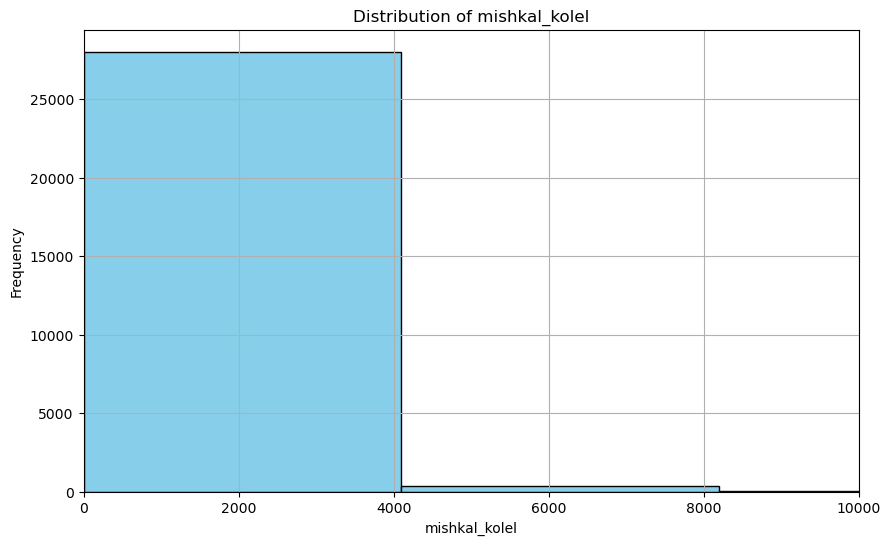

In [152]:
# A histogram will display the distribution of mishkal_kolel values:
fig_size = (10, 6)
column_data = df['mishkal_kolel']
num_bins = 20
bar_color = 'skyblue'
edge_color = 'black'

plt.figure(figsize=fig_size)
plt.hist(column_data, bins=num_bins, color=bar_color, edgecolor=edge_color)
plt.xlim(0, 10000)  # Adjusting the range based on our data
plt.title('Distribution of mishkal_kolel')
plt.xlabel('mishkal_kolel')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

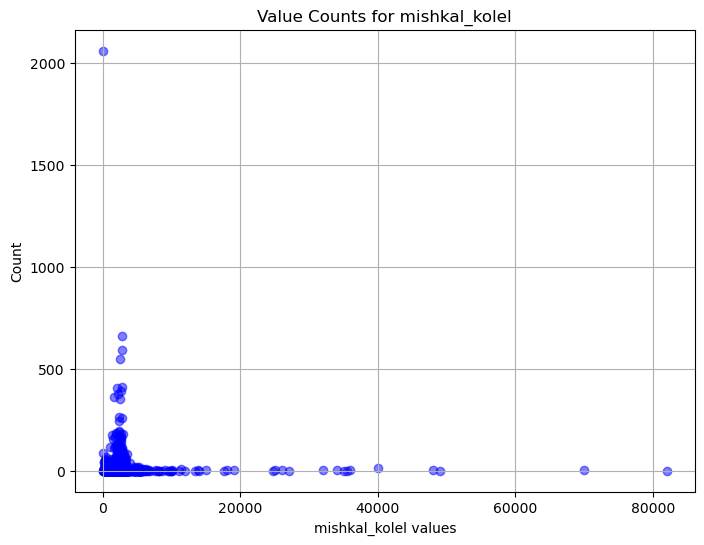

In [153]:
def plot_value_counts(df, column):
    value_counts = df[column].value_counts()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(value_counts.index, value_counts.values, color='blue', alpha=0.5)
    plt.title(f'Value Counts for {column}')
    plt.xlabel(f'{column} values')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

plot_value_counts(df, 'mishkal_kolel')

In [154]:
df = df[df['mishkal_kolel'] < 10000]

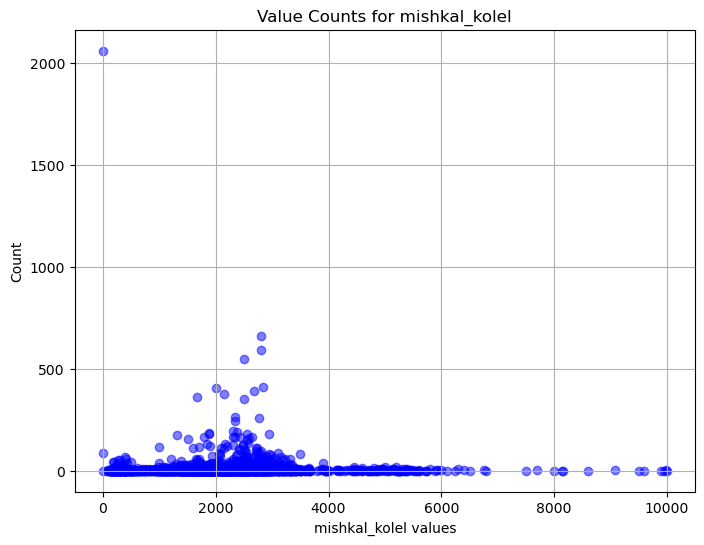

In [155]:
plot_value_counts(df, 'mishkal_kolel')

In [156]:
percentage_zero_values = (df['mishkal_kolel'] == 0).mean() * 100
print(f"Percentage of rows where the value in the 'mishkal_kolel' column is 0: {percentage_zero_values:.2f}%")

Percentage of rows where the value in the 'mishkal_kolel' column is 0: 7.26%


In [157]:
def remove_zero_rows(df):
    # מחיקה של השורות שבהן בעמודת 'mishkal_kolel' יש ערך 0 או "0"
    df = df[~df['mishkal_kolel'].isin([0, "0"])]
    return df

In [158]:
remove_zero_rows(df)

tozeret_nm sug_rechev_nm            degem_nm  mishkal_kolel  \
0              Buick   פרטי נוסעים                CU69    1800.000000   
1      Mercedes-Benz   פרטי נוסעים              211065    2222.653846   
3             Toyota   פרטי נוסעים  היברדAHV40L-CEXGBA    1665.756579   
4                BMW   פרטי נוסעים                ZW41    2342.812500   
5      Mercedes-Benz   פרטי נוסעים             221.174    2894.176471   
...              ...           ...                 ...            ...   
28452           Jeep   פרטי נוסעים  GRAND CHEROKE JEAG    2312.500000   
28454       Chrysler   פרטי נוסעים            Cherokee    2382.298246   
28455            BMW   פרטי נוסעים         528I   FS51    2771.938596   
28456            BMW   פרטי נוסעים                FG4C    2760.000000   
28457  Mercedes-Benz         מונית         סדצרמ E220D    1775.000000   

      shnat_yitzur nefach_manoa tozeret_eretz_nm degem_manoa         sug_yevu  \
0             1995         3785            ארה"ב         KT1    יבוא אישי-חדש   
1             2002         3199           גרמניה        M112  יבוא אישי-משומש   
3             2011         2400            ארה"ב         2AZ  יבוא אישי-משומש   
4             2010         2993            ארה"ב       306DS  יבוא אישי-משומש   
5             2010         5461           גרמניה        M157  יבוא אישי-משומש   
...            ...          ...              ...         ...              ...   
28452         2019         3604            ארה"ב         ERB    יבוא אישי-חדש   
28454         2017         3604            ארה"ב         ERB  יבוא אישי-משומש   
28455         2011         2996           גרמניה     N53B30A  יבוא אישי-משומש   
28456         2010         2979            ארה"ב     N54B30A    יבוא אישי-חדש   
28457         2020         1950           גרמניה      654920  יבוא אישי-משומש   

       tokef_dt_year  tokef_dt_month  
0               2023              12  
1               2025               1  
3               2025               1  
4               2023              12  
5               2023              12  
...              ...             ...  
28452           2024              12  
28454           2025               2  
28455           2024               3  
28456           2025               6  
28457           2025               5  

[26333 rows x 11 columns]

#### Taking care of the feature: sug_rechev_nm

In [166]:
df['sug_rechev_nm'].unique()

array(['רכב פרטי', 'גרר', 'משאית מגורים', 'אופנוע', 'רכב שטח', 'טרקטור',
       'משאית', 'מונית', 'אוטובוס'], dtype=object)

In [160]:
def check_and_display(df):
    value_counts = df['sug_rechev_nm'].value_counts()
    
    for index, row in df.iterrows():
        if value_counts[row['sug_rechev_nm']] < 5:
            print(f"Value in sug_rechev_nm: {row['sug_rechev_nm']} | Corresponding degem_nm: {row['degem_nm']}")

check_and_display(df)

Value in sug_rechev_nm: משא להובלת רכב | Corresponding degem_nm: FALF45.180E10
Value in sug_rechev_nm: משא סגור  דפן הידראולית | Corresponding degem_nm: FRR90
Value in sug_rechev_nm: גרור סגור | Corresponding degem_nm: RV
Value in sug_rechev_nm: משא רגיל תא נהג פתוח | Corresponding degem_nm: 460.218-230GE
Value in sug_rechev_nm: משא ב.אחוד פתוח-תא כפול | Corresponding degem_nm: RN25736
Value in sug_rechev_nm: משא ב.אחוד פתוח-תא כפול | Corresponding degem_nm: 207D607D
Value in sug_rechev_nm: קטנוע | Corresponding degem_nm: Z50J
Value in sug_rechev_nm: משא סגור  דפן הידראולית | Corresponding degem_nm: NQR70
Value in sug_rechev_nm: גרור לכלבים | Corresponding degem_nm: TH-3 ROY2_________
Value in sug_rechev_nm: משא בלתי אחוד פתוח | Corresponding degem_nm: TK 20503
Value in sug_rechev_nm: קטנוע | Corresponding degem_nm: איטליה הונדה
Value in sug_rechev_nm: אוטובוס זעיר פרטי | Corresponding degem_nm: Express
Value in sug_rechev_nm: משא רגיל תא נהג פתוח | Corresponding degem_nm: Pinzgauer
Va

In [164]:
def reduce_vehicle_types(df):
    # נורמליזציה של הערכים בעמודה sug_rechev_nm
    def normalize_vehicle_type(vehicle_name):
        # אם הערך מכיל 'גרר', 'גר', 'נגרר', 'גרור', 'גררים', 'גררו'
        if any(keyword in vehicle_name for keyword in ['גרר', 'גר', 'נגרר', 'גרור', 'גררים', 'גררו']):
            return 'גרר'
        
        # אם הערך מכיל 'משא', 'משאית', 'משאת'
        if any(keyword in vehicle_name for keyword in ['משא', 'משאית', 'משאת']):
            return 'משאית'
        
        # אם הערך מכיל 'מרכב', 'מגורים', 'בית'
        if any(keyword in vehicle_name for keyword in ['מרכב', 'מגורים', 'בית']):
            return 'משאית מגורים'
        
        # אם הערך מכיל 'אופנוע', 'קטנוע'
        if any(keyword in vehicle_name for keyword in ['אופנוע', 'קטנוע']):
            return 'אופנוע'
        
        # אם הערך מכיל 'טרקטור', 'טרקטר'
        if any(keyword in vehicle_name for keyword in ['טרקטור', 'טרקטר']):
            return 'טרקטור'
        
        # אם הערך מכיל 'אוטובוס'
        if 'אוטובוס' in vehicle_name:
            return 'אוטובוס'
        
        # אם הערך מכיל 'שטח', 'מדברי', 'סיור'
        if any(keyword in vehicle_name for keyword in ['שטח', 'מדברי', 'סיור']):
            return 'רכב שטח'
        
        # אם הערך מכיל 'פרטי'
        if 'פרטי' in vehicle_name:
            return 'רכב פרטי'
        
        # אם לא נמצא אף מקרה, מחזירים את הערך המקורי
        return vehicle_name

    # אפליקציה של הפונקציה לעמודת sug_rechev_nm_reduced
    df['sug_rechev_nm'] = df['sug_rechev_nm'].apply(normalize_vehicle_type)
    
    return df


In [165]:
df = reduce_vehicle_types(df)

C:\Users\lior vauonuo\AppData\Local\Temp\ipykernel_15704\2886627245.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sug_rechev_nm'] = df['sug_rechev_nm'].apply(normalize_vehicle_type)


In [ ]:
df['sug_rechev_nm_reduced'].value_counts()

In [ ]:
#Going to replace the Hebrew names into English because it doesnt show good in visoalizations.
hebrew_to_english = {
    "רכב פרטי": "Private Vehicle",
    "אופנוע": "Motorcycle",
    "משאית": "Truck",
    "טרקטור": "Tractor",
    "גרר": "Tow Truck",
    "מונית": "Taxi",
    "משאית מגורים": "Residential Truck",
    "רכב שטח": "SUV",
    "אוטובוס": "Bus"
}

# Replace values in the DataFrame without SettingWithCopyWarning
df.loc[:, 'sug_rechev_nm_reduced'] = df['sug_rechev_nm_reduced'].replace(hebrew_to_english)

# Print the updated column
print(df['sug_rechev_nm_reduced'].value_counts())

In [ ]:
# Create an empty list to store results
results = []

# Loop through each unique vehicle type
for vehicle_type in df['sug_rechev_nm_reduced'].unique():
    # Filter the DataFrame for the current vehicle type
    filtered_df = df[df['sug_rechev_nm_reduced'] == vehicle_type]
    
    # Calculate count, mean, and median for 'mishkal_kolel'
    count = len(filtered_df)
    mean = filtered_df['mishkal_kolel'].mean()
    median = filtered_df['mishkal_kolel'].median()
    
    # Append the results as a dictionary
    results.append({
        'Vehicle_Type': vehicle_type,
        'Count': count,
        'Mean': mean,
        'Median': median
    })

# Convert the list of dictionaries into a DataFrame
counts_df = pd.DataFrame(results)

# Sort the resulting DataFrame by the 'Mean' column in descending order
counts_df = counts_df.sort_values(by='Mean', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
counts_df

In [ ]:
categories = list(df['sug_rechev_nm_reduced'].unique())
results = []
for category in categories:
    filtered_df = df[df['sug_rechev_nm_reduced'] == category]
    quantity = filtered_df.shape[0]
    average = filtered_df['mishkal_kolel'].mean()
    median = filtered_df['mishkal_kolel'].median()
    results.append({'Category': category, 'Quantity': quantity, 'Average Mishkal Kolel': average,'Median Mishkal Kolel': median})
results_df = pd.DataFrame(results)
results_df

# Outliers & Anomalies

In [ ]:
def detect_outliers_iqr(data, column):
    #אחוזון ה25 של הערכים בעמודה משקל כולל
    Q1 = data[column].quantile(0.25)
    #אחוזון ה75 של הערכים בעמודה משקל כולל
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    #גבול תחתון: ערכים שקטנים מ... נחשבים חריגים
    lower_bound = Q1 - 1.5 * IQR
    #גבול עליון: ערכים שגדולים מ... נחשבים חריגים
    upper_bound = Q3 + 1.5 * IQR

    # Filter for outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in 'mishkal_kolel'
outliers_mishkal_kolel = detect_outliers_iqr(df, 'mishkal_kolel')
print(f"Number of outliers in 'mishkal_kolel': {len(outliers_mishkal_kolel)}")

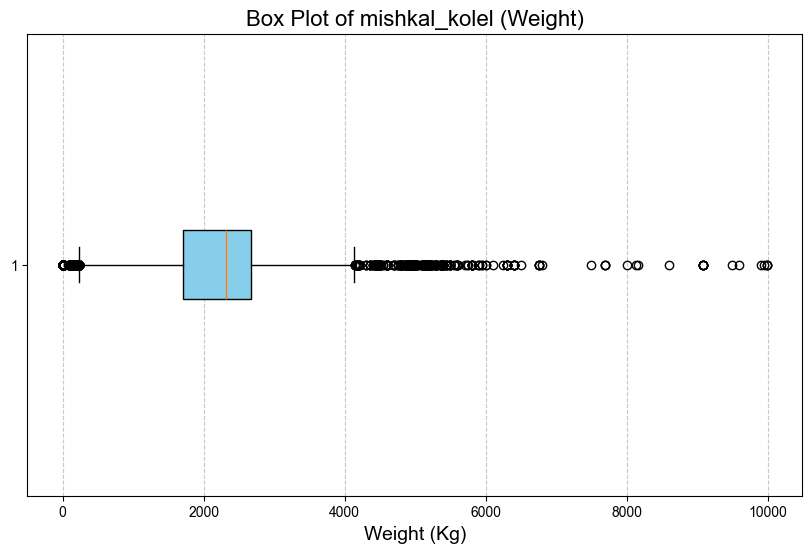

In [364]:
# Box plot to visualize outliers of mishkal_kolel
plt.figure(figsize=(10, 6))
plt.boxplot(df['mishkal_kolel'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of mishkal_kolel (Weight)', fontsize=16)
plt.xlabel('Weight (Kg)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#For anomalies: We will use Isolation Forest and pattern analysis within groups (e.g., unexpected mishkal_kolel for specific sug_rechev_nm_reduced).

In [365]:
# Isolation Forest
#אלגוריתם למידת מכונה אשר נועד לזהות ערכים חריגים. האלגוריתם עובד ע"י בניית עצים שמבודדים נקודות נתונים באופן אקראי, תוך שימוש בחיתוכים חוזרים ונשנים במרחב נתונים. ערכים חריגים מבודדים מהר יותר ולכן נחשבים אנומליות.
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
# Apply Isolation Forest and avoid SettingWithCopyWarning
df.loc[:, 'anomaly'] = isolation_forest.fit_predict(df[['mishkal_kolel']])


# Filter anomalies
anomalies = df[df['anomaly'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")


Number of anomalies detected: 283


In [366]:
#Group-Based Anomaly Detection: We can check for vehicles with weights (mishkal_kolel) that deviate significantly within each vehicle type (sug_rechev_nm_reduced).
def group_based_anomalies(data, group_column, value_column):
    anomalies = []
    groups = data.groupby(group_column)
    
    for group, subset in groups:
        Q1 = subset[value_column].quantile(0.25)
        Q3 = subset[value_column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter anomalies in group
        group_anomalies = subset[(subset[value_column] < lower_bound) | (subset[value_column] > upper_bound)]
        anomalies.append(group_anomalies)
    
    return pd.concat(anomalies)

# Find anomalies within each vehicle type
group_anomalies = group_based_anomalies(df, 'sug_rechev_nm_reduced', 'mishkal_kolel')
print(f"Number of group-based anomalies: {len(group_anomalies)}")


Number of group-based anomalies: 1992


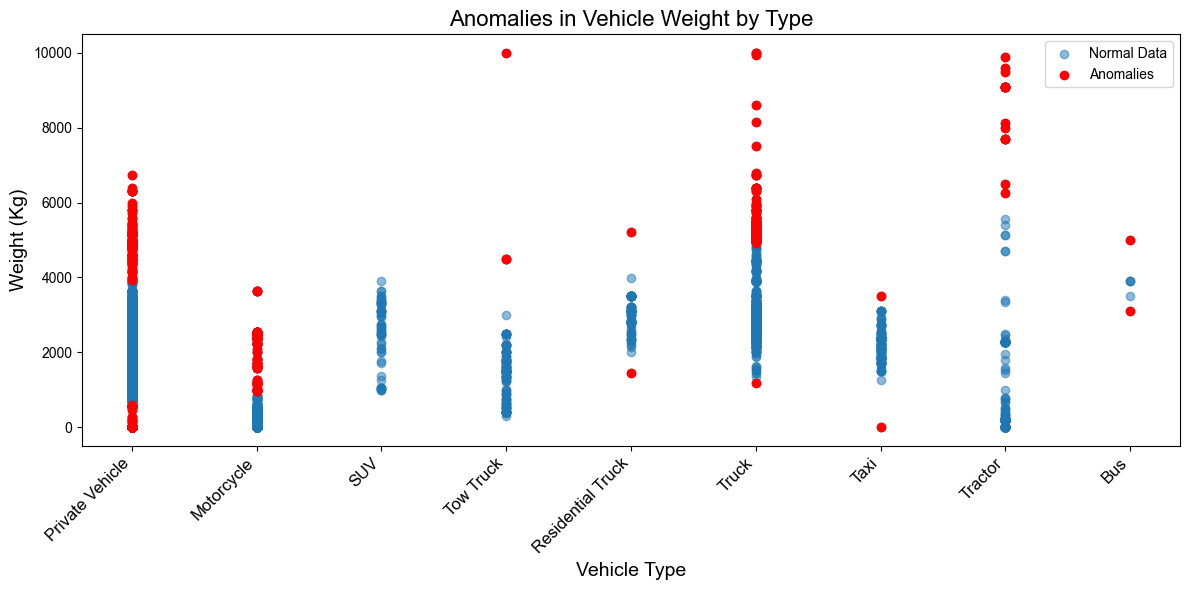

In [367]:
# Scatter plot with anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['sug_rechev_nm_reduced'], df['mishkal_kolel'], alpha=0.5, label='Normal Data')
plt.scatter(group_anomalies['sug_rechev_nm_reduced'], group_anomalies['mishkal_kolel'], color='red', label='Anomalies')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Weight (Kg)', fontsize=14)
plt.title('Anomalies in Vehicle Weight by Type', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

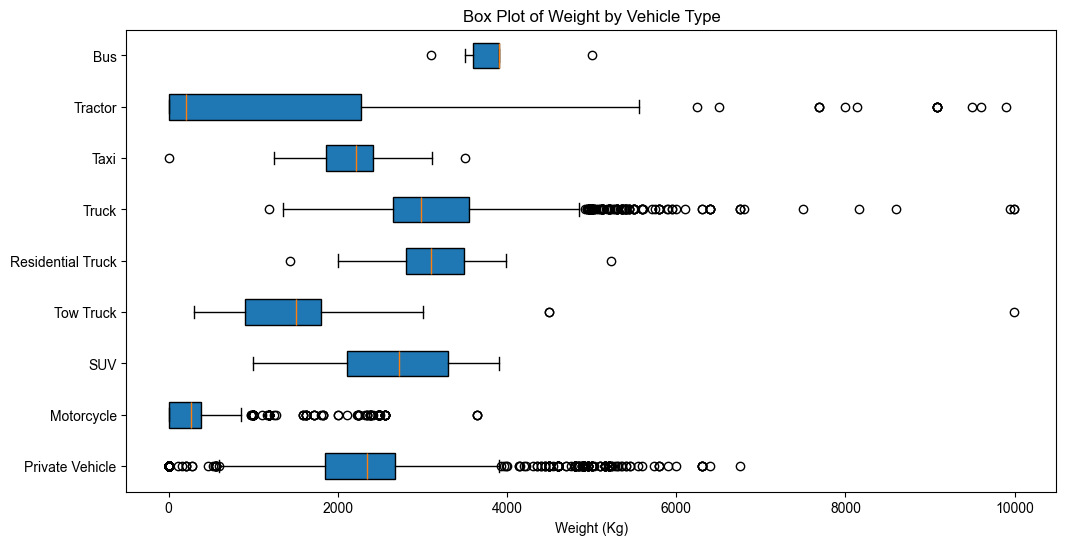

In [372]:
#Visualize Outliers by Vehicle Type
plt.figure(figsize=(12, 6))
plt.boxplot(
    [df[df['sug_rechev_nm_reduced'] == vt]['mishkal_kolel'] for vt in df['sug_rechev_nm_reduced'].unique()],
    patch_artist=True,
    tick_labels=df['sug_rechev_nm_reduced'].unique(),  # Updated from 'labels' to 'tick_labels'
    vert=False
)
plt.title('Box Plot of Weight by Vehicle Type')
plt.xlabel('Weight (Kg)')
plt.show()

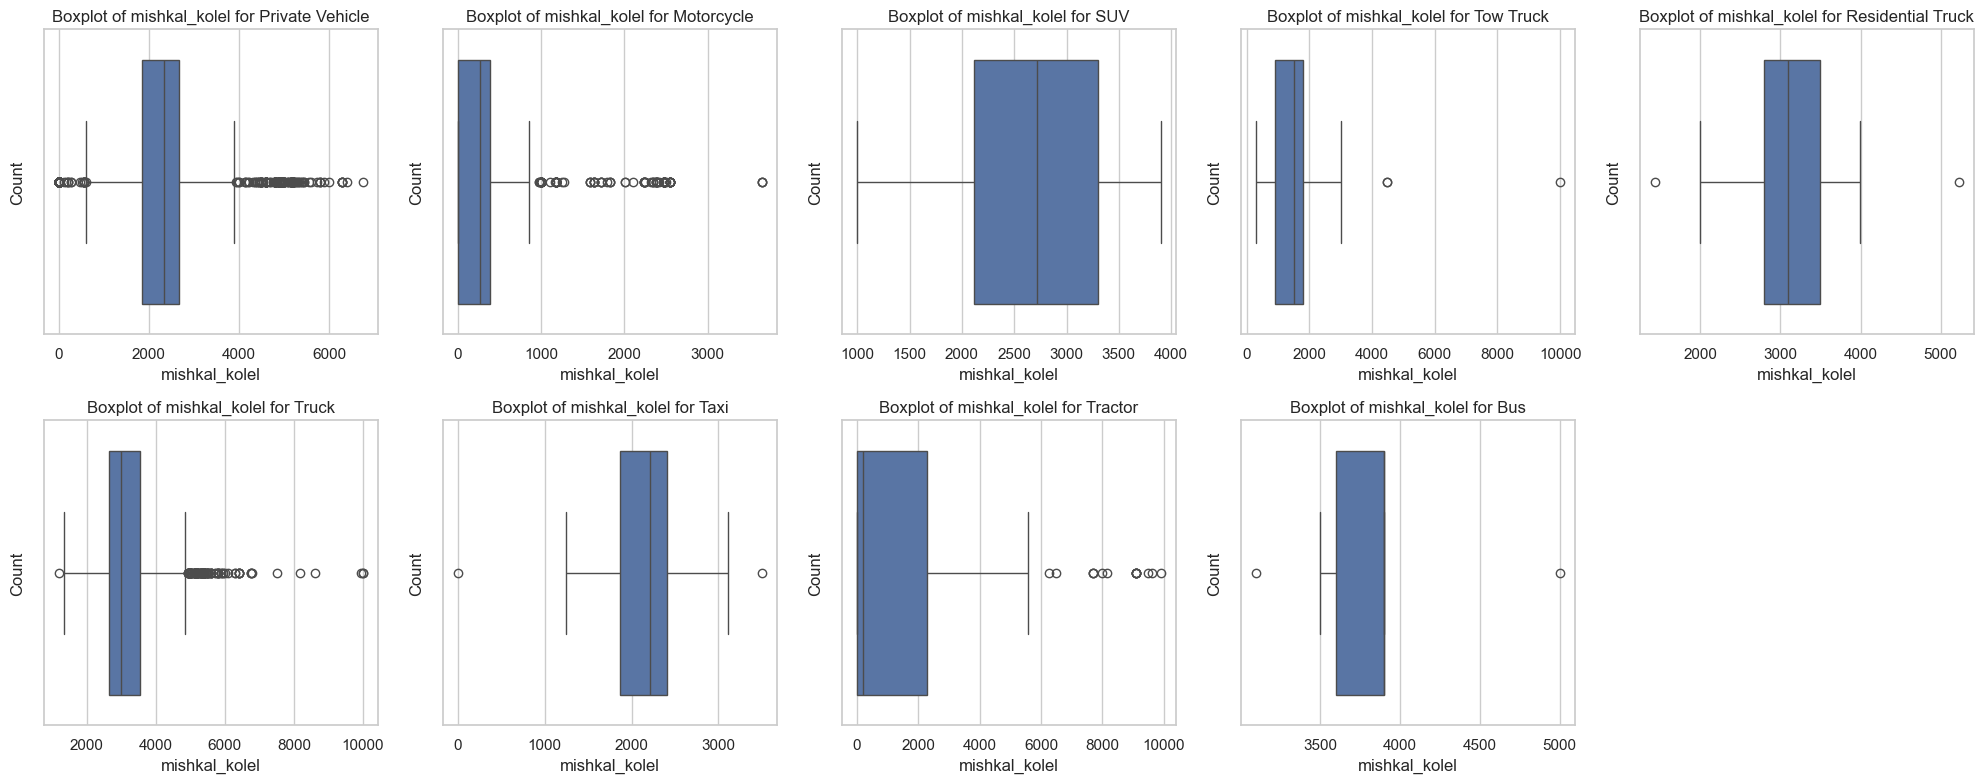

In [386]:
def plot_boxplots_by_category(data, category_column, value_column):
    sns.set(style="whitegrid")
    categories = data[category_column].unique()
    num_categories = len(categories)
    num_cols = 5
    num_rows = (num_categories + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))  # Adjusted the figure size
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    for i in range(num_rows * num_cols):
        if i < num_categories:
            category = categories[i]
            sns.boxplot(x=value_column, data=data[data[category_column] == category], ax=axes[i])
            axes[i].set_title(f'Boxplot of {value_column} for {category}')
            axes[i].set_xlabel(value_column)
            axes[i].set_ylabel('Count')
        else:
            axes[i].set_visible(False)
            
    plt.tight_layout()
    plt.show()
D
plot_boxplots_by_category(df, 'sug_rechev_nm_reduced', 'mishkal_kolel')

#Vehicles with years of manufacture that are too old or too futuristic might be outliers.

In [387]:
def detect_outliers_year(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter for outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers

# Detect outliers in 'shnat_yitzur'
outliers_year = detect_outliers_year(df, 'shnat_yitzur')
print(outliers_year[['sug_rechev_nm_reduced', 'shnat_yitzur']])

Number of outliers in shnat_yitzur: 4549
      sug_rechev_nm_reduced  shnat_yitzur
6           Private Vehicle          1981
67          Private Vehicle          1977
102         Private Vehicle          1979
116         Private Vehicle          1983
119         Private Vehicle          1989
...                     ...           ...
28368       Private Vehicle          1973
28371       Private Vehicle          1993
28432       Private Vehicle          1993
28439       Private Vehicle          1976
28440            Motorcycle          1991

[4549 rows x 2 columns]


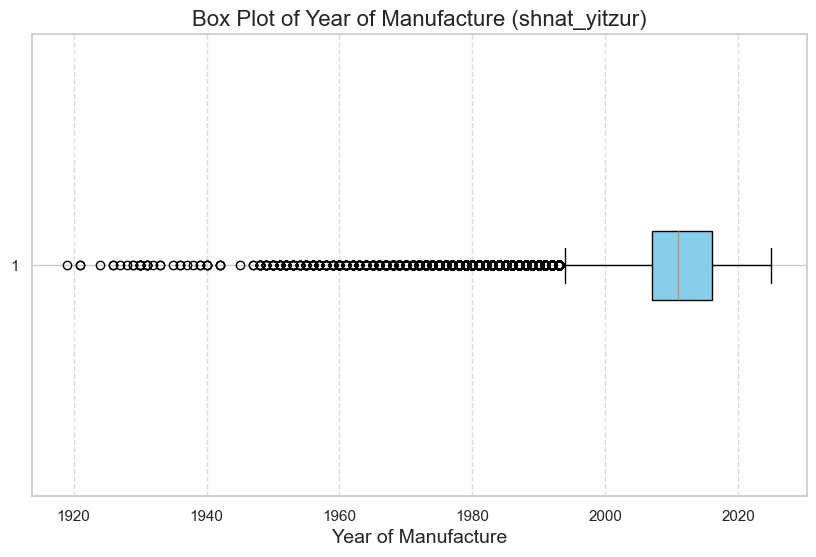

In [388]:
# Box plot to visualize year of manufacture outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['shnat_yitzur'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Year of Manufacture (shnat_yitzur)', fontsize=16)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#Engine volumes that are too small or large for the vehicle type might be outliers.

In [389]:
def detect_outliers_engine(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter for outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers

# Detect outliers in 'nefach_manoa'
outliers_engine = detect_outliers_engine(df, 'nefach_manoa')
print(outliers_engine[['sug_rechev_nm_reduced', 'nefach_manoa']])

Number of outliers in nefach_manoa: 466
      sug_rechev_nm_reduced  nefach_manoa
175         Private Vehicle          6460
343         Private Vehicle          8194
358         Private Vehicle          7500
569         Private Vehicle          6598
648         Private Vehicle          9997
...                     ...           ...
28116       Private Vehicle          6997
28123       Private Vehicle          6750
28188                 Truck          6506
28217                 Truck          7441
28332       Private Vehicle          6604

[466 rows x 2 columns]


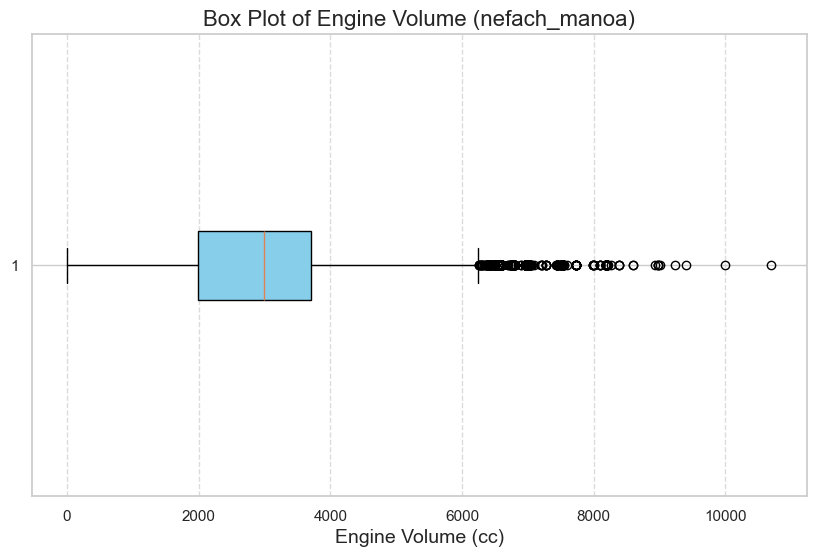

In [390]:
# Box plot to visualize engine volume outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df['nefach_manoa'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Engine Volume (nefach_manoa)', fontsize=16)
plt.xlabel('Engine Volume (cc)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------

In [391]:
df

tozeret_nm sug_rechev_nm           degem_nm  mishkal_kolel  \
0      Mercedes-Benz   פרטי נוסעים             221171    2716.875000   
1      Mercedes-Benz   פרטי נוסעים               E240    1649.545455   
2                NaN   פרטי נוסעים       (C320)203064       0.000000   
3      Mercedes-Benz   פרטי נוסעים       כר 6 + E 240    1650.000000   
4             Toyota   פרטי נוסעים    AVV50L - CEXGBA    1661.750000   
...              ...           ...                ...            ...   
28460            NaN   פרטי נוסעים  RL5H6 EX-L אודיסי       0.000000   
28461       Chrysler   פרטי נוסעים           Cherokee    2382.298246   
28462            BMW   פרטי נוסעים        528I   FS51    2771.938596   
28463            BMW   פרטי נוסעים               FG4C    2760.000000   
28464  Mercedes-Benz         מונית        סדצרמ E220D    1775.000000   

       shnat_yitzur  nefach_manoa tozeret_eretz_nm degem_manoa  \
0              2007          5462           גרמניה        M273   
1              2000          2398           גרמניה       OM112   
2              2001          3199           גרמניה        M112   
3              2000          2398           גרמניה      210069   
4              2013          2362            ארה"ב         2AR   
...             ...           ...              ...         ...   
28460          2012          3471            ארה"ב       J35Z8   
28461          2017          3604            ארה"ב         ERB   
28462          2011          2996           גרמניה     N53B30A   
28463          2010          2979            ארה"ב     N54B30A   
28464          2020          1950           גרמניה      654920   

              sug_yevu  tokef_dt_year  tokef_dt_month sug_rechev_nm_reduced  \
0      יבוא אישי-משומש           2024               2       Private Vehicle   
1      יבוא אישי-משומש           2024              10       Private Vehicle   
2        יבוא אישי-חדש           2024               8       Private Vehicle   
3      יבוא אישי-משומש           2024              12       Private Vehicle   
4      יבוא אישי-משומש           2025               4       Private Vehicle   
...                ...            ...             ...                   ...   
28460    יבוא אישי-חדש           2025               1       Private Vehicle   
28461  יבוא אישי-משומש           2025               2       Private Vehicle   
28462  יבוא אישי-משומש           2024               3       Private Vehicle   
28463    יבוא אישי-חדש           2025               6       Private Vehicle   
28464  יבוא אישי-משומש           2025               5                  Taxi   

       anomaly  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
28460        1  
28461        1  
28462        1  
28463        1  
28464        1  

[28402 rows x 13 columns]

# שלב 1: קידוד משתנים קטגוריים

In [419]:
categorical_columns = ['tozeret_nm', 'sug_rechev_nm_reduced', 'tozeret_eretz_nm', 'sug_yevu']
le = LabelEncoder()
for col in categorical_columns:
    df.loc[:, col] = le.fit_transform(df[col])

#בחירת משתנים ועמודת מטרה
features = ['tozeret_nm', 'sug_rechev_nm_reduced', 'mishkal_kolel', 'shnat_yitzur', 
            'nefach_manoa', 'tozeret_eretz_nm', 'tokef_dt_year', 'tokef_dt_month']
X = df[features].copy() # יצירת עותק של המשתנים
y = df['degem_manoa']  # עמודת המטרה

#  המרת עמודות מספריות ל־float לפני טרנספורמציה
numeric_features = ['mishkal_kolel', 'shnat_yitzur', 'nefach_manoa']
X[numeric_features] = X[numeric_features].astype(float)  
#  נרמול העמודות המספריות
scaler = StandardScaler()
X.loc[:, numeric_features] = scaler.fit_transform(X[numeric_features])

# חלוקה לסט אימון וסט בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# דגימה של 10% מנתוני האימון
X_train_sample = X_train.sample(frac=0.1, random_state=42)  
y_train_sample = y_train.loc[X_train_sample.index]


# שלב 2: אימון מודלים


In [441]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sample, y_train_sample)
# חיזוי על סט הבדיקה
rf_preds = rf_model.predict(X_test)


In [442]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_sample, y_train_sample)
# חיזוי על סט הבדיקה
gb_preds = gb_model.predict(X_test)

In [446]:
# Neural Network
nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_model.fit(X_train_sample, y_train_sample)
# חיזוי על סט הבדיקה
nn_preds = nn_model.predict(X_test)

In [443]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_sample, y_train_sample)
# חיזוי על סט הבדיקה
svm_preds = svm_model.predict(X_test)

In [444]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_sample, y_train_sample)
# חיזוי על סט הבדיקה
knn_preds = knn_model.predict(X_test)

# שלב 3: הערכת מודלים


In [449]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(classification_report(y_true, y_pred, zero_division=0))  # טיפול במקרים של Precision/Recall לא מוגדרים
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# קריאה לפונקציה רק אם התחזיות קיימות
if 'rf_preds' in locals():
    evaluate_model("Random Forest", y_test, rf_preds)

if 'gb_preds' in locals():
    evaluate_model("Gradient Boosting", y_test, gb_preds)

if 'nn_preds' in locals():
    evaluate_model("Neural Network", y_test, nn_preds)
else:
    print("Neural Network predictions (nn_preds) are not defined.")

if 'svm_preds' in locals():
    evaluate_model("SVM", y_test, svm_preds)

if 'knn_preds' in locals():
    evaluate_model("KNN", y_test, knn_preds)

--- Random Forest ---
                    precision    recall  f1-score   support

                         0.84      1.00      0.91        32
            *18V8*       0.00      0.00      0.00         0
          *3.7LV6*       0.00      0.00      0.00         1
             *3G8*       0.00      0.00      0.00         1
               *K*       0.00      0.00      0.00         1
                 -       0.00      0.00      0.00         0
                 .       0.00      0.00      0.00         1
                 0       0.00      0.00      0.00         0
            005CST       0.00      0.00      0.00         1
                01       0.00      0.00      0.00         1
           0330CUT       0.00      0.00      0.00         0
             03407       0.00      0.00      0.00         1
       048934061AG       0.00      0.00      0.00         1
        04893652AB       0.00      0.00      0.00         1
        05158049AG       0.00      0.00      0.00         1
          05244T1

### הערכת כל מודל

In [450]:
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)
evaluate_model("Neural Network", y_test, nn_preds)
evaluate_model("SVM", y_test, svm_preds)
evaluate_model("KNN", y_test, knn_preds)

--- Random Forest ---
                    precision    recall  f1-score   support

                         0.84      1.00      0.91        32
            *18V8*       0.00      0.00      0.00         0
          *3.7LV6*       0.00      0.00      0.00         1
             *3G8*       0.00      0.00      0.00         1
               *K*       0.00      0.00      0.00         1
                 -       0.00      0.00      0.00         0
                 .       0.00      0.00      0.00         1
                 0       0.00      0.00      0.00         0
            005CST       0.00      0.00      0.00         1
                01       0.00      0.00      0.00         1
           0330CUT       0.00      0.00      0.00         0
             03407       0.00      0.00      0.00         1
       048934061AG       0.00      0.00      0.00         1
        04893652AB       0.00      0.00      0.00         1
        05158049AG       0.00      0.00      0.00         1
          05244T1

# שלב 4: השוואת ביצועי המודלים

In [451]:
models = {
    "Random Forest": rf_model.score(X_test, y_test),
    "Gradient Boosting": gb_model.score(X_test, y_test),
    "Neural Network": nn_model.score(X_test, y_test),
    "SVM": svm_model.score(X_test, y_test),
    "KNN": knn_model.score(X_test, y_test)
}

# הצגת תוצאות ההשוואה

In [452]:
comparison = pd.DataFrame(models.items(), columns=["Model", "Accuracy"])
print(comparison)

               Model  Accuracy
0      Random Forest  0.409083
1  Gradient Boosting  0.008097
2     Neural Network  0.332864
3                SVM  0.049463
4                KNN  0.242211


------------------------------------------------------------------------------------------------------------------------------

# Unsupervised Analysis

# שלב 1: עיבוד נתונים


In [458]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# בחירת עמודות רלוונטיות
features = ['mishkal_kolel', 'shnat_yitzur', 'nefach_manoa']

# קידוד עמודת 'nefach_manoa' לערכים מספריים אם היא קטגוריאלית
le = LabelEncoder()
df.loc[:, 'nefach_manoa'] = le.fit_transform(df['nefach_manoa'])

# נרמול העמודות המספריות
scaler = StandardScaler()
X = scaler.fit_transform(df[features])  # העבר את הנתונים ל-fit_transform


# שלב 2: Clustering עם KMeans


In [463]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [464]:
# הערכת איכות הקלאסטרים עם Silhouette Score
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"KMeans Silhouette Score: {silhouette_kmeans:.2f}")

KMeans Silhouette Score: 0.41


In [468]:
# הוספת תוויות הקלאסטרים ל-DataFrame
df.loc[:, 'kmeans_cluster'] = kmeans_labels

# שלב 3: Clustering עם DBSCAN


In [470]:
dbscan = DBSCAN(eps=1.5, min_samples=10)  # ניתן לכוונן את הפרמטרים
dbscan_labels = dbscan.fit_predict(X)

In [471]:
# הערכת איכות הקלאסטרים עם Silhouette Score ל-DBSCAN
if len(set(dbscan_labels)) > 1:  # Silhouette Score דורש יותר מקלאסטר אחד
    silhouette_dbscan = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.2f}")
else:
    print("DBSCAN resulted in a single cluster or noise only.")

DBSCAN Silhouette Score: 0.71


In [473]:
# הוספת תוויות הקלאסטרים ל-DataFrame
df.loc[:,'dbscan_cluster'] = dbscan_labels

# שלב 4: ויזואליזציה של הקלאסטרים


In [474]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title, fontsize=16)
    plt.xlabel('Normalized Feature 1 (e.g., Weight)', fontsize=14)
    plt.ylabel('Normalized Feature 2 (e.g., Production Year)', fontsize=14)
    plt.grid(alpha=0.5)
    plt.show()

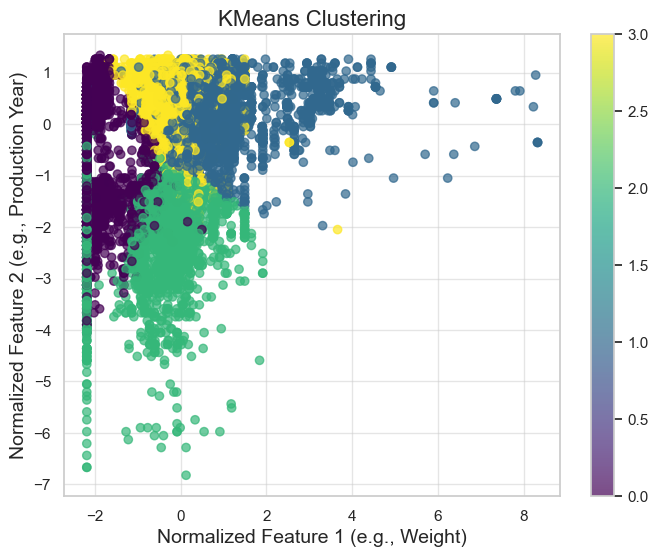

In [475]:
# ויזואליזציה של הקלאסטרים מ-KMeans
plot_clusters(X, kmeans_labels, "KMeans Clustering")

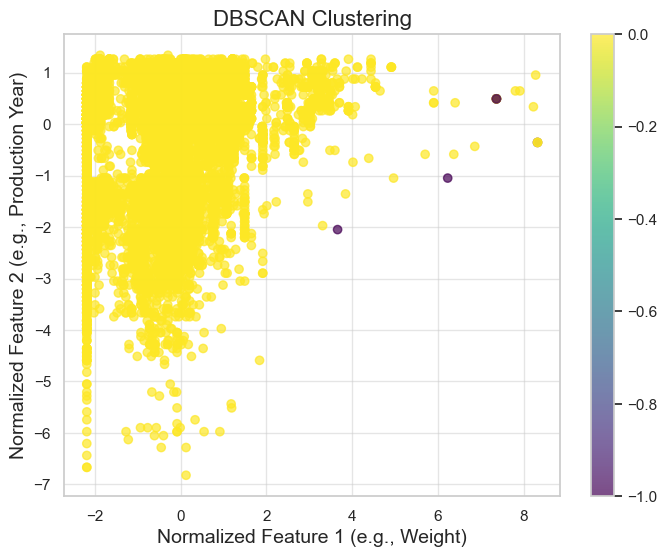

In [476]:
# ויזואליזציה של הקלאסטרים מ-DBSCAN
plot_clusters(X, dbscan_labels, "DBSCAN Clustering")


----------------------------------------------------------------------------------------

In [478]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
